# Proyecto 1 - Etapa 1

### Grupo 12
- **Estudiante 1** : Juan Sebastián Ardila López
- **Estudiante 2** : William Andrés Bayona Vergara
- **Estudiante 3** : Ana María Hernández Lasso

Requerimos la instalación pip install de:
- pip install pandas
- pip install numpy
- pip install matplotlib
- pip install num2words
- pip install nltk
- pip install spacy
- python -m spacy download es_core_news_sm
- pip install scikit-learn
- pip install wordcloud

# Etapa 1. Entendimiento de los Datos
Entenderemos el dataset con el que vamos a trabajar en el proyecto.

## 1.1 Exploración de datos

### Carga del dataset

Primero, cargaremos el dataset desde el archivo excel.

In [1]:
import pandas as pd
import numpy as np

#Cargamos el dataset de los datos de entrenamiento del proyecto
df_ods = pd.read_excel('./Datos_proyecto.xlsx')
#Queremos conocer el número de filas y columnas
filas, columnas = df_ods.shape

print("Cantidad de filas:", filas)
print("Cantidad de columnas:", columnas)

#Mostramos las primeras filas de las opiniones para saber cómo son los datos
print("Primeras filas del dataset:")
display(df_ods.head())

#Mostramos las últimas filas de las opiniones para saber cómo son los datos
print("Últimas filas del dataset:")
display(df_ods.tail())

#Mostramos la información del dataset
print("Información del dataset:")
display(df_ods.info())

Cantidad de filas: 2424
Cantidad de columnas: 2
Primeras filas del dataset:


,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,Para los niños más pequeños (bebés y niños peq...,4
2,"Además, la formación de especialistas en medic...",3
3,En los países de la OCDE se tiende a pasar de ...,4
4,Este grupo se centró en las personas que padec...,3


Últimas filas del dataset:


,textos,labels
2419,La tutoría de carrera está diseñada para apoya...,4
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1
2422,"Sin embargo, estas fallas del mercado implican...",3
2423,Aunque existen programas para convertirse espe...,4


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB


None

Conocemos que hay dos variables en el dataset:

- **textos**: contiene las opiniones ciudadanas en lenguaje natural, específicamente en idioma español. 

- **labels**: corresponde a la etiqueta numérica que clasifica cada texto en relación con un Objetivo de Desarrollo Sostenible (ODS).  


In [2]:
# Calculamos longitud de cada descripción
df_ods['textos_longitud'] = df_ods['textos'].str.len()

#Estadisticas de la longitud de las descripciones
df_ods_estadisticas = df_ods['textos_longitud'].describe()
df_ods_estadisticas

count    2424.000000
mean      683.223185
std       223.563695
min       303.000000
25%       513.000000
50%       647.000000
75%       809.250000
max      1492.000000
Name: textos_longitud, dtype: float64

In [3]:
#Veamos las estadisticas de los textos segun el ODS
textos_por_ods = df_ods.groupby('labels')['textos_longitud'].agg(['mean', 'min', 'max']).dropna()
textos_por_ods

,mean,min,max
labels,,,
1,680.588119,313,1492
3,680.991051,303,1486
4,686.468293,304,1452


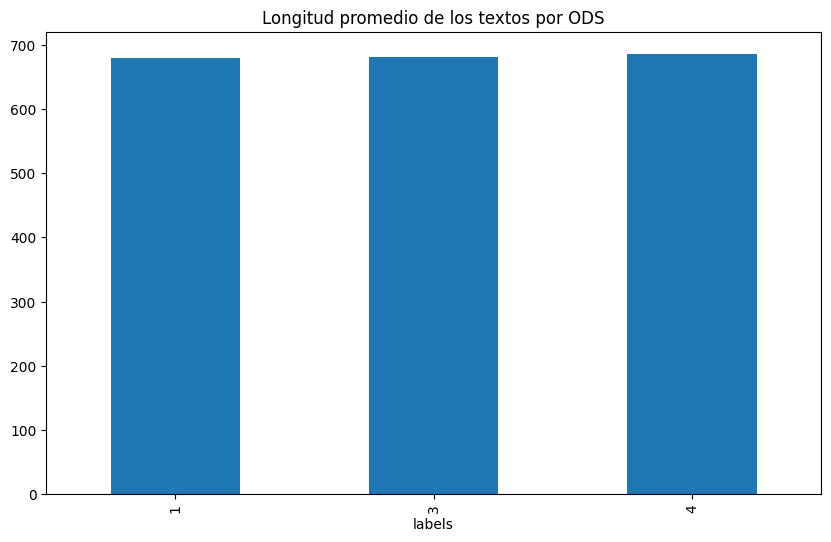

In [4]:
#Grafiquemos la longitud de los textos por ODS
import matplotlib.pyplot as plt

#Un diagrama de barras para la longitud promedio de los textos por ODS
fig, ax = plt.subplots(figsize=(10, 6))
textos_por_ods['mean'].plot(kind='bar', ax=ax)
ax.set_title('Longitud promedio de los textos por ODS')
plt.show()

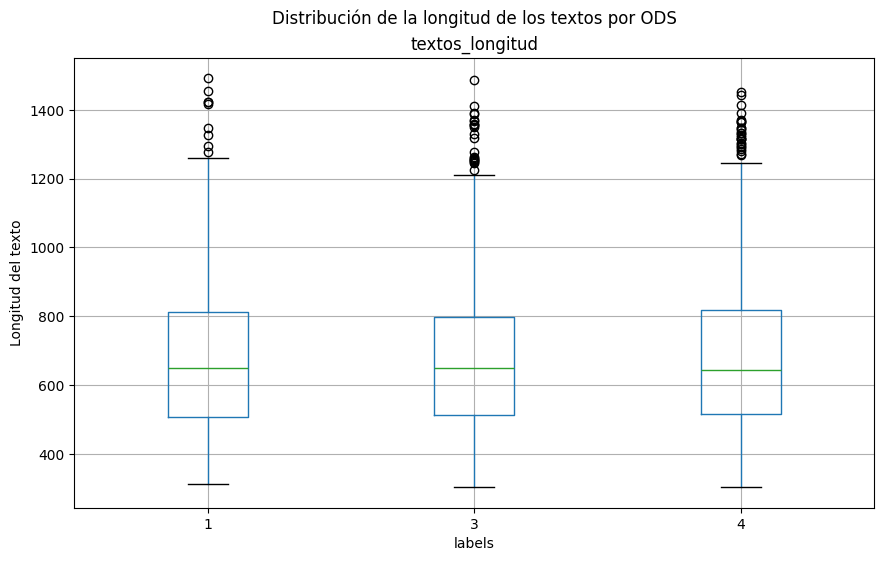

In [5]:
#Un diagrama de bigotes o boxplot para la longitud de los textos por ODS
fig, ax = plt.subplots(figsize=(10, 6))
df_ods.boxplot(column='textos_longitud', by='labels', ax=ax)
ax.set_ylabel('Longitud del texto')
fig.suptitle('Distribución de la longitud de los textos por ODS')

plt.show()

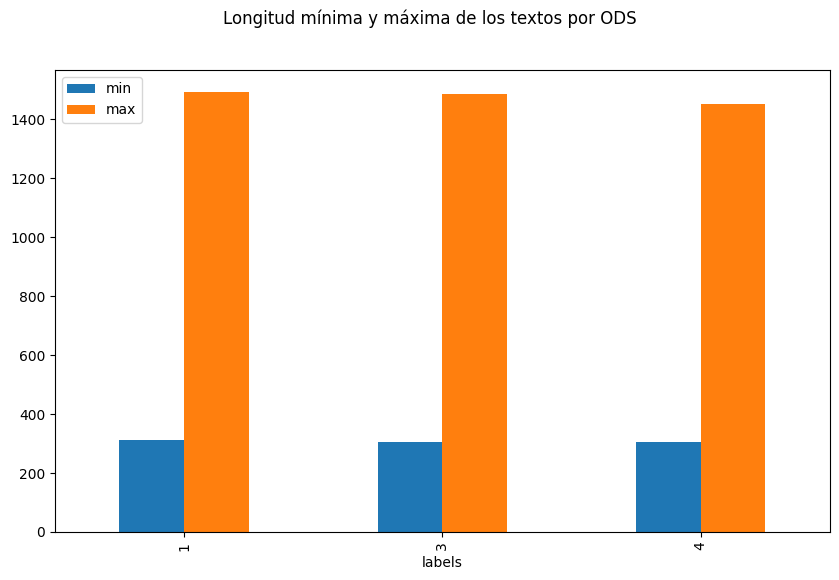

In [6]:
#Un diagrama para ver la longitud minima y maxima de los textos por ODS
fig, ax = plt.subplots(figsize=(10, 6))
textos_por_ods[['min', 'max']].plot(kind='bar', ax=ax)
fig.suptitle('Longitud mínima y máxima de los textos por ODS')
plt.show()

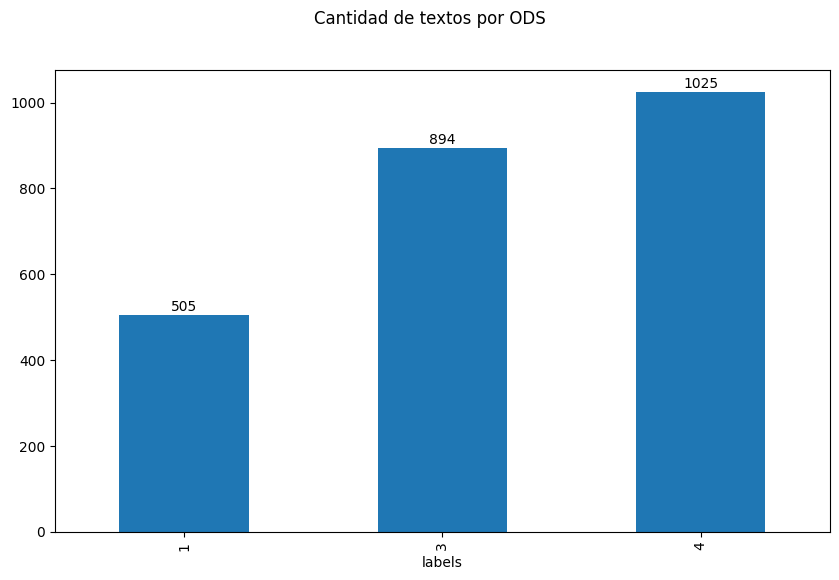

In [7]:
#Hagamos un diagrama de barras para ver la cantidad de textos por ODS
fig, ax = plt.subplots(figsize=(10, 6))
df_ods['labels'].value_counts().sort_index().plot(kind='bar', ax=ax)
fig.suptitle('Cantidad de textos por ODS')
#Pongamos el valor encima de cada barra
for indice_barra, valor in enumerate(df_ods['labels'].value_counts().sort_index()): 
    ax.text(indice_barra, valor + 3, str(valor), ha='center', va='bottom')
plt.show()

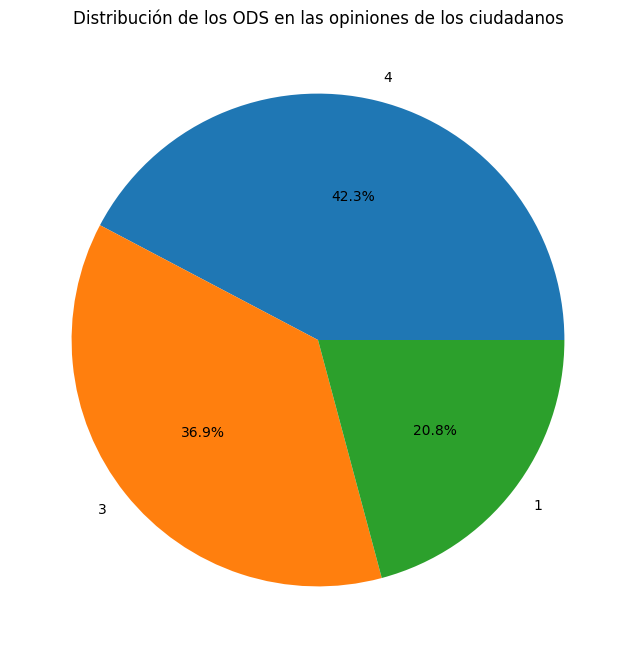

In [8]:
#Hagamos un pie chart para ver la distribución de los ODS (1,3,4)
ods_counts = df_ods['labels'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
ods_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax)
ax.set_ylabel('')
ax.set_title('Distribución de los ODS en las opiniones de los ciudadanos')
plt.show()


**Perfilamiento de datos**

Se nos han compartido 2424 registros de opiniones ciudadanas sobre problemáticas sociales relacionadas con los Objetivos de Desarrollo Sostenible (ODS), etiquetados según 1 (Fin de la pobreza), 3 (Salud y bienestar) y 4 (Educación de calidad). 

El dataset está compuesto por dos columnas que describen las generalidades de una opinión ciudadana. Está la columna `textos`, la cual contiene la opinión de un ciudadano (en lenguaje natural, y además en el idioma español), claramente corresponde a texto. También encontramos la columna `labels`, la cual da una única clasificación a la opinión en cuestión, es una columna o variable numérica. 

La mayoría de las opiniones ciudadanas en el conjunto de datos pertenece al ODS 4, Educación de calidad (42.3%). Seguido, está ODS 3, Saluds y Bienestar (36.9%). Finalmente, el 20.8% de las opiniones pertenecen al ODS 1, Fin de la Pobreza. 

Conocemos que la longitud promedio de todas las opiniones sin distinción es de aproximadamente 683 caracteres, con un mínimo de 303 y un máximo de 1.492 caracteres. Ahora bien, la longitud promedio de las opiniones, clasificadas por ODS, es similar, siendo cercana a los 700 caracteres. 

Gracias al boxplot, sabemos que la mayoría de opiniones están entre los 500 y 800 caracteres, con algunos outliers o datos fuera de este rango, los cuales corresponden a texto más extensos, que van de 1200 caracteres hasta un poco más de 1400 caracteres. 

En general, los datos que tenemos tienen opiniones con extensión similar y hace posible dar un procesamiento coherente para ellas:
- La longitud de los textos se encuentra balanceada, mas no la cantidad de textos por ODS. 
- La cantidad de opiniones por ODS está desbalanceada. Claramente, hay muchas más opiniones de las ODS 4 y 3 en comparación con la ODS 1. De hecho, la ODS 1 tiene aproximadamente la mitad de datos que la ODS 4. Para la 1 hay 505 opiniones; para la 3, 894; para la 4, 1025. Esto debe tenerse en cuenta al revisar el desempeño de los modelos.

## 1.2 Análisis de calidad de los datos

### Completitud: Revisión de nulos y cadenas vacías

In [9]:
df_ods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   textos           2424 non-null   object
 1   labels           2424 non-null   int64 
 2   textos_longitud  2424 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 56.9+ KB


In [10]:
# Verificamos nulos y vacíos en la columna textos
num_nulls = df_ods['textos'].isnull().sum()
num_empty = (df_ods['textos'].str.strip() == '').sum()

print("Número de valores nulos en 'textos':", num_nulls)
print("Número de cadenas vacías en 'textos':", num_empty)

Número de valores nulos en 'textos': 0
Número de cadenas vacías en 'textos': 0


No hay datos nulos, ni cadenas vacías en los datos. Tanto la columna textos como la columna de etiquetas o labels están completas. Ambas tienen 2424 datos. 

### Unicidad: Revision de duplicados: totales y parciales

In [11]:
#Veamos los duplicados totales
num_duplicados = df_ods.duplicated().sum()
print("Número de filas duplicadas en el dataset:", num_duplicados)

Número de filas duplicadas en el dataset: 0


In [12]:
#Agrupamos por texto y contamos cuántos labels distintos tiene
conflictos = df_ods.groupby('textos')['labels'].nunique()

#Nos quedamos solo con los que tienen más de 1 etiqueta distinta
conflictos = conflictos[conflictos > 1]

print("Número de textos con varias etiquetas:", conflictos.shape[0])


Número de textos con varias etiquetas: 0


Verificamos que no existen filas duplicadas ni duplicados parciales, que en este caso son textos repetidos con etiquetas distintas.

### Consistencia: Confirmar que los formatos de las columnas son acordes a lo esperado

In [13]:
#Revisamos que todos los registros en la columna 'textos' sean string
tipos_textos = df_ods['textos'].apply(type).unique()
print("Tipos de datos en 'textos':", tipos_textos)

#Revisamos que todos los registros en  la columna'labels' sean numéricos
tipos_labels = df_ods['labels'].apply(type).unique()
print("Tipos de datos en 'labels':", tipos_labels)

Tipos de datos en 'textos': [<class 'str'>]
Tipos de datos en 'labels': [<class 'int'>]


En efecto, los tipos de datos son los esperados para cada columna.

### Validez: Confirmar que los valores estén dentro de rangos lógicos para el contexto del problema

En nuestro caso, vamos a revisar que los tipos de ODS sean 1, 3 o 4. Ningún otro tipo.

In [14]:
valores_unicos = df_ods['labels'].unique()
print("Valores únicos en labels:", valores_unicos)

Valores únicos en labels: [4 3 1]


En efecto, los únicos tipos de ODS en los datos que recibimos son 1, 3 y 4.

El dataset de entrenamiento es de buena calidad, ya que no tiene valores nulos, ni duplicados totales o parciales, los tipos de datos son correctos y los valores se encuentran dentro de los rangos esperados.

## Enfoque analítico

Para el proyecto de ODS y opiniones ciudadanas, hemos sido contratados para construir un modelo de aprendizaje automático que pueda clasificar automáticamente las opiniones de la ciudadanía en relación con los Objetivos de Desarrollo Sostenible (ODS) 1, 3 y 4. En ese contexto, y una vez entendidos los datos, identificamos:

- **Tipo de analítica**: Predictiva, porque queremos saber qué va a pasar, en este caso: ¿A qué ODS (1, 3 o 4) va a pertenecer la nueva opinión de un cuidadano?

- **Tipo de aprendizaje**: Supervisado, debido a que contamos con un dataset etiquetado. Cada registro que tenemos incluye el texto de la opinión y la etiqueta que indica a qué ODS está asociada (1, 3 o 4), lo que permite entrenar el modelo con ejemplos donde conocemos la respuesta. Siempre queremos predecir el tipo de ODS: 1-ODS, 3-ODS, 4-ODS de la opinión.

- **Tipo de tarea supervisada**: Clasificación, ya que la variable objetivo es el tipo de ODS y puede tomar los valores 1, 3 o 4. Toma el valor 1 para ODS de Fin de la Pobreza, 3 para Salud y Bienestar y 4 para Educación de Calidad. Además, contamos con un conjunto de entrenamiento de datos etiquetados (qué clase corresponde a cada registro). Es importante notar que, en este caso, los números son solo etiquetas de categorías, no magnitudes continuas.

# Etapa 2. Procesamiento de texto: tokenización y limpieza de palabras

Comencemos haciendo una función para eliminar ruido en los registros de los textos:
1. Pasemos todo a minúsculas
2. Eliminamos signos de puntuación (no incluye tildes), pero si puntos, comas, comillas, entre otros.
3. Reemplazamos números por su equivalente en palabras


In [15]:
import nltk
import string
from nltk.corpus import stopwords
from num2words import num2words

#Esto se hara cuando el texto ya este tokenizado
def limpiar_texto(texto_tokenizado):
    texto_limpio_tokenizado = []
    for palabra in texto_tokenizado:
        # Pasar a minúsculas
        palabra = palabra.lower()
        # Eliminar signos de puntuación
        palabra = palabra.translate(str.maketrans('', '', string.punctuation))
        # Reemplazar números por su representación en palabras
        if palabra.isdigit():
            palabra = num2words(palabra, lang='es')
        # Agregar si no está vacía
        if palabra:
            texto_limpio_tokenizado.append(palabra)
    return texto_limpio_tokenizado

Para procesar las opiniones de los ciudadanos, hay que hacer tokenización, lematización y normalización. Recodermos un poco estos conceptos para tener claro lo que vamos a realizar:

**Tokenización:** dividimos las frases o las oraciones en tokens (palabras)

**Lematización:** llevamos cada palabra o token a su base gramatical (comimos -> comer)

**Normalización:** aplicamos la función que reduce ruido en los tokens para poder unificar el texto

Hacemos el proceso de tokenización

In [16]:
#Tokenizamos el texto (cada registro de textos en el dataframe)
def tokenizar_columna(df, columna_texto, nueva_columna):
    tokens_col = []
    #Hacemos un split por espacio para tokenizar
    for texto in df[columna_texto]:
        tokens_col.append(str(texto).split())
    df[nueva_columna] = tokens_col
    return df

df_ods = tokenizar_columna(df_ods, 'textos', 'tokens')

#Veamos cómo quedaron los tokens
df_ods[['textos', 'tokens']].head()

,textos,tokens
0,"""Aprendizaje"" y ""educación"" se consideran sinó...","[""Aprendizaje"", y, ""educación"", se, consideran..."
1,Para los niños más pequeños (bebés y niños peq...,"[Para, los, niños, más, pequeños, (bebés, y, n..."
2,"Además, la formación de especialistas en medic...","[Además,, la, formación, de, especialistas, en..."
3,En los países de la OCDE se tiende a pasar de ...,"[En, los, países, de, la, OCDE, se, tiende, a,..."
4,Este grupo se centró en las personas que padec...,"[Este, grupo, se, centró, en, las, personas, q..."


Una vez tenemos los tokens podemos hacer una visualización interesante: La cantidad de palabras promedio por ODS

Cantidad promedio de palabras por ODS:
ODS 1: 110.37 palabras
ODS 3: 108.03 palabras
ODS 4: 106.63 palabras


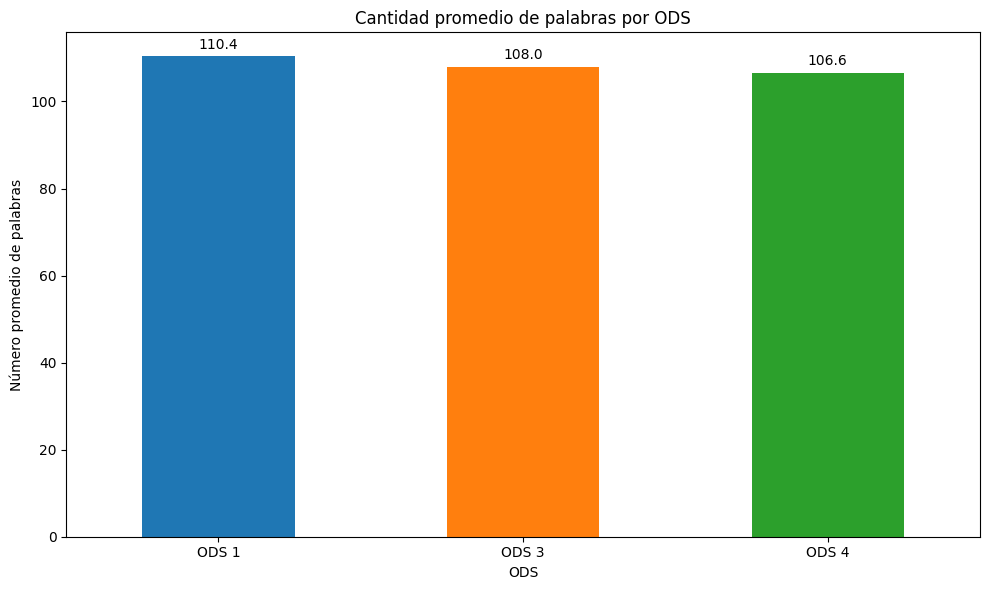

In [17]:
# Calculamos la cantidad promedio de palabras por ODS
palabras_promedio_por_ods = df_ods.groupby('labels')['tokens'].apply(lambda x: x.apply(len).mean()) #TODO REVISAR

print("Cantidad promedio de palabras por ODS:")
for ods, promedio in palabras_promedio_por_ods.items():
    print(f"ODS {ods}: {promedio:.2f} palabras")

# Creamos un gráfico de barras para visualizar
fig, ax = plt.subplots(figsize=(10, 6))
palabras_promedio_por_ods.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax.set_title('Cantidad promedio de palabras por ODS')
ax.set_xlabel('ODS')
ax.set_ylabel('Número promedio de palabras')
ax.set_xticklabels([f'ODS {int(x)}' for x in palabras_promedio_por_ods.index], rotation=0)

# Añadimos los valores encima de cada barra
for i, valor in enumerate(palabras_promedio_por_ods.values):
    ax.text(i, valor + 1, f'{valor:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Eliminamos ruido para una lematización adecuada

In [18]:
#Eliminamos ruido para poder hacer lematización después
#Debemos hacerlo, o tokens como '"aprendizaje"' no se lematizarán bien, pues tienen comillas o signos de puntuación y 
#spacy puede no reconocer bien el token
df_ods["tokens_limpios"] = df_ods["tokens"].apply(limpiar_texto)

#Veamos cómo quedaron los tokens limpios
df_ods[['tokens', 'tokens_limpios']].head()

,tokens,tokens_limpios
0,"[""Aprendizaje"", y, ""educación"", se, consideran...","[aprendizaje, y, educación, se, consideran, si..."
1,"[Para, los, niños, más, pequeños, (bebés, y, n...","[para, los, niños, más, pequeños, bebés, y, ni..."
2,"[Además,, la, formación, de, especialistas, en...","[además, la, formación, de, especialistas, en,..."
3,"[En, los, países, de, la, OCDE, se, tiende, a,...","[en, los, países, de, la, ocde, se, tiende, a,..."
4,"[Este, grupo, se, centró, en, las, personas, q...","[este, grupo, se, centró, en, las, personas, q..."


Hacemos el proceso de lematización

In [19]:
#Lematizamos los tokens

import spacy

#Cargar el modelo de spaCy para español
nlp = spacy.load("es_core_news_sm")

def lematizar_los_tokens(df, columna_tokens, nueva_columna):
    lemas_col = []
    for lista_tokens in df[columna_tokens]:
        #Creamos un doc de spaCy a partir de los tokens, pues asi spacy hace la lematización
        doc = nlp(" ".join(lista_tokens))
        lemas = []
        #para cada palabra en el doc (en la frase)
        for token in doc:
            if not token.is_space:
                lemas.append(token.lemma_)
        #token.lemma_ devuelve la raíz de cada palabra
        #se hace una lista de lemas con las palabra ya lematizadas que no son espacios
        lemas = [tok.lemma_ for tok in doc if not tok.is_space]
        lemas_col.append(lemas)
    df[nueva_columna] = lemas_col
    return df

#Aplicamos la lematización
df_ods = lematizar_los_tokens(df_ods, "tokens_limpios", "tokens_lematizados")

#Veamos cómo quedaron los tokens lematizados
display(df_ods[["tokens_limpios", "tokens_lematizados"]].head())


,tokens_limpios,tokens_lematizados
0,"[aprendizaje, y, educación, se, consideran, si...","[aprendizaje, y, educación, él, considerar, si..."
1,"[para, los, niños, más, pequeños, bebés, y, ni...","[para, el, niño, más, pequeño, bebé, y, niño, ..."
2,"[además, la, formación, de, especialistas, en,...","[además, el, formación, de, especialista, en, ..."
3,"[en, los, países, de, la, ocde, se, tiende, a,...","[en, el, país, de, el, ocde, él, tender, a, pa..."
4,"[este, grupo, se, centró, en, las, personas, q...","[este, grupo, él, centrar, en, el, persona, qu..."


Hacemos una normalización final con el fin de dejar el texto en un mismo formato:
1. Eliminamos stopwords
2. Quitamos las tildes, que no estaban incluidas en la vez que quitamos los signos de puntuación
3. Nos aseguramos de no dejar palabras vacías

In [20]:
import string, unicodedata 

#Descargamos las stopwords y las definimos en español
#Recordar super importante: las stopwords son palabras que son usuales en un idioma, en este caso el español, pero que no aportan casi valor para analizar el texto
#Por ejemplo: el, un, para, por, y
nltk.download("stopwords")
stop_words = set(stopwords.words("spanish"))

#Hagamos una normalización final para eliminar cualquier ruido que haya quedado

#Función para quitar tildes
def quitar_tildes(s: str) -> str:
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

def normalizar_texto(texto_tokenizado):
    texto_limpio_tokenizado = []
    for palabra in texto_tokenizado:
        #Quitamos las tildes
        if 'á' in palabra or'é' in palabra or 'í' in palabra or'ó' in palabra or'ú' in palabra or 'ü' in palabra:
            palabra = quitar_tildes(palabra)
        #Eliminamos stopwords y palabras vacías
        if palabra and palabra not in stop_words:
            texto_limpio_tokenizado.append(palabra)
    return texto_limpio_tokenizado

#Aplicamos la normalización final
df_ods["tokens_finales"] = df_ods["tokens_lematizados"].apply(normalizar_texto)

#Veamos cómo quedaron los tokens finales
df_ods[["tokens_lematizados", "tokens_finales"]].head()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tokens_lematizados,tokens_finales
0,"[aprendizaje, y, educación, él, considerar, si...","[aprendizaje, educacion, considerar, sinonir, ..."
1,"[para, el, niño, más, pequeño, bebé, y, niño, ...","[niño, mas, pequeño, bebe, niño, pequeño, capa..."
2,"[además, el, formación, de, especialista, en, ...","[ademas, formacion, especialista, medicina, ge..."
3,"[en, el, país, de, el, ocde, él, tender, a, pa...","[pais, ocde, tender, pasar, curso, obligatorio..."
4,"[este, grupo, él, centrar, en, el, persona, qu...","[grupo, centrar, persona, padecer, trastorno, ..."


Vamos a hacer una division importante en los datos. Vamos a tomar el 90% de los datos para unicamente entrenamiento y prueba de los modelos y nos reservaremos un 10% que usaremos al final para comprar las metricas de los 3 modelos, la idea es que este 10% son datos que ningun modelo nunca ha visto durante su entrenamiento

In [21]:
from sklearn.model_selection import train_test_split

# Guardar una copia del dataframe original antes de dividirlo
df_ods_original = df_ods.copy()

# Dividir el dataframe: 90% para df_ods y 10% para df_metricas
df_ods, df_metricas = train_test_split(df_ods_original, test_size=0.1, random_state=42)

# Reiniciar los índices para ambos dataframes
df_ods = df_ods.reset_index(drop=True)
df_metricas = df_metricas.reset_index(drop=True)

# Mostrar las dimensiones de ambos dataframes
print(f"Dimensiones de df_ods (90% de los datos): {df_ods.shape}")
print(f"Dimensiones de df_metricas (10% de los datos): {df_metricas.shape}")



Dimensiones de df_ods (90% de los datos): (2181, 7)
Dimensiones de df_metricas (10% de los datos): (243, 7)


Continuamos con el proceso de vectorización, que es el último paso en el preprocesamiento de textos. Este permite representar las palabras de una forma numérica, de forma que puedan ser procesados con los distintos modelos, pues no las comprenden como texto.

Vectorizar, en nuestro caso, lo podemos pensar como:
- Construir una matriz texto-término (cada palabra es un término).
- Usar TF-IDF, que nos dice que tan relevante es la palabra para describir ese texto (opinión).

TF-IDF:
Da un puntaje alto a palabras que:
- Palabras que aparecen mucho en un texto concreto (TF alto)
- Pero que son poco comunes en los demás textos (IDF alto)

In [22]:
#Preparamos los documentos como strings, unimos los tokens finales dejando un espacio entre ellos
#Todos los documentos se llaman corpus
corpus = df_ods["tokens_finales"].apply(lambda toks: " ".join(toks)).fillna("")

corpus

0       si bien mayoria persona trastorno mental comun...
1       mayoria estadounidense seisciento cuarenta dos...
2       ¿ ventaja tener alumno trabajar distinto estra...
3       segun encuesta servicio federal vigilancia sal...
4       cambio haber relacionar mayor incidencia pobre...
                              ...                        
2176    censo docente proporcionar variedad dato alto ...
2177    asimismo punto referencia internacional rendim...
2178    ministro educacion asunto cultural lander esta...
2179    via tecnicaprofesional ofrecer mismo diploma c...
2180    modelo rand future elderly nueve ser mas acerc...
Name: tokens_finales, Length: 2181, dtype: object

Vamos a crear el vectorizador para TF-IDF teniendo en cuenta lo siguiente:
1. No vamos a agregar preprocesamiento de más por parte del vectorizador: ya las palabras están en minúscula y ya se limpiaron los datos

2. Ignoraremos las palabras que aparecen en menos de dos documentos, ya que su ocurrencia es muy extraña y no ayuda a realmente distinguir un tipo de ods. De hecho, hasta podrían ser errores ortográficos.

3. Ignoraremos las palabras que aparecen en más del 90% de los documentos, ya que al ser demasiado comunes no aportan a distinguir un tipo de ods, por ejemplo palabras como "problema" o "ods" no serían útiles, pero podrían repetirse bastante bajo este contexto.

4. Solo vamos a considerar tokens con al menos dos letras, que no ayudan a hacer distinción. Dejamos dos, porque las palabras no o sí pueden ser útiles al distinguir opiniones.

5. No vamos a fijarnos en números (como años: 2006, 2007) para distinguir una opinión, ya que no resulta útil para clasificar. Estos pudieron no haber estado puros (2006año, en2007) y por ello pudieron haber estado presentes luego del filtrado. De todas formas, no los consideraremos.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creamos el vectorizador TF-IDF
tfidf = TfidfVectorizer(
    preprocessor=None, #No aplicamos más preprocesamiento, ya limpiamos antes
    lowercase=False, #No convertimos a minúsculas, ya lo hicimos
    min_df=2, #Ignoramos palabras que aparecen en menos de 2 documentos
    max_df=0.90, #Ignoramos palabras que aparecen en más del 90% de los documentos (demasiado comunes, como si fuera "ods", no aporta)
    token_pattern=r"(?u)\b[^\W\d_]{2,}\b" #Solo consideramos tokens con al menos 2 letras (ignoramos números y palabras de una letra)
)

X_tfidf = tfidf.fit_transform(corpus) #Esto crea la matriz TF-IDF de opinion-terminos


In [24]:
#Obtenemos todas las palabras únicas que el vectorizador vio en el corpus
terminos = tfidf.get_feature_names_out()

#Veamos el tamaño del vocabulario
print("Tamaño del total de términos:", len(terminos))

#Veamos una parte de la matriz en forma de DataFrame para saber si la vectorización se hizo bien
#Veamos las primeras 5 filas
df_preview = pd.DataFrame( X_tfidf[:5].toarray(),  columns=terminos)
#Veamos las primeras 10 columnas, no todas las palabras
df_preview.iloc[:, :10]


Tamaño del total de términos: 4660


,abajo,abandonar,abandono,abarcar,abierto,abitur,abogar,abolir,abordado,abordaje
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
import numpy as np

def top_terminos(doc_id, top):
    row = X_tfidf[doc_id].toarray().ravel()
    indices = np.argsort(-row)[:top]
    return [(terminos[i], float(row[i])) for i in indices if row[i] > 0]

#Mosrtremos los términos más importantes del documento 0 (su top 10) y sus puntos ITF-IDF
print(top_terminos(0, 10)) 


[('mental', 0.37584633104571713), ('trastorno', 0.3583219866901891), ('publicacion', 0.26715583131800175), ('doce', 0.2623045935289292), ('comun', 0.2106330475896045), ('empleo', 0.1974780285032276), ('correlacionado', 0.18398995257691736), ('subrair', 0.18398995257691736), ('tmc', 0.18398995257691736), ('mil', 0.18019418767993475)]


# Etapa 3. Modelado
Se propondrán diferentes modelos para cumplir con la clasificación de los textos

### 3.1. Estudiante 3 - Ana María Hernández Lasso: Modelo de Regresión Logística

**¿Qué es el modelo de regresión logística?**

La regresión logística es un modelo de aprendizaje supervisado que se utiliza para resolver problemas de clasificación, que es justo nuestro caso. Mientras que en la regresión lineal se busca predecir valores continuos, la regresión logística predice la probabilidad de pertenencia a una clase o categoría. 

De hecho, la regresión lineal justamente regresa un valor de los números reales, mientras que la regresión logística, al hablar de probabilidades, toma valores entre 0 y 1 teniendo en cuenta las variables explicativas.

En su forma más simple, la regresión logística se usa para clasificar entre dos categorías (binaria, como sí o no), pero puede extenderse a más clases, como las de la ODS: 1, 3 o 4. Esto lo hacemos con la función softmax, que ayuda a dar probabilidades a que una opinión pertenezca a cada una de las categorías y se queda con la más alta como predicción.

**Justificación de la elección**

He elegido un modelo de Regresión Logística por las siguientes razones:

1. La regresión logística justamente está destinada a predecir probabilidades de pertenecer a una clase, que es justo lo que necesitamos para poder conocer a qué categoría de ODS puede pertecener una noticia.

2. Funciona bien con alta dimensionalidad: 

- La dimensionalidad es el número de variables explicativas para cada dato. En este caso, como estamos trabajando con texto y para hacer vectorización aplicamos TF-IDF, cada palabra que sea única del vocabulario de todos los documentos (del corpus) se convirtió en una variable. Como vimos, tenemos 4905 términos, por lo que cada opinión ciudadana quedó representada como un vector de 4905 dimensiones. 

- El modelo de regresión logística funciona bien con alta dimensionalidad, de hecho es una opción que se acostumbra considerar al manejar TF-IDF, y puede aplicarse una técnica llamada regularización para evitar que el modelo "memorice" demasiado los datos de entrenamiento y no pueda generalizar la clasificación a nuevos casos, en caso de ser necesario (Van Otten, 2023). Así, hay solución para ese escenario. 

3. En la regresión logística, para cada palabra del vocabulario se asigna un coeficiente que dice cuánto la presencia de esa palabra influye en la probabilidad de que el texto pertenezca a una categoría (ODS 1, 3 o 4). Por ejemplo, el coeficiente de "escuela" podría ser alto y positivo para el tipo de ODS 4, que es sobre Educación de Calidad, lo que sube la probabilidad de que el documento sea clasificado en ese tipo. Esto es útil para nuestro caso, ya que cada ODS se puede relacionar con distintos términos clave (por ejemplo, pobreza con ODS 1, hospital con ODS 3, escuela con ODS 4), lo que facilita interpretar por qué el modelo asigna una opinión a determinada categoría. Además, este modelo permite ver los coeficientes y ver qué palabras tienen mayor coeficiente para cada clase. 

4. Este modelo puede manejar el desbalance de clases, pues recordemos que la ODS 1 tiene menos registros en comparación con los otros tipos. Esto es importante porque, si no se corrige, el modelo tendería a favorecer siempre a las clases con mayor cantidad de registros (ODS 3 y 4), clasificando mal la que tiene menos filas, y llegando a generar un sesgo, pues no se entrenó con los suficientes datos. La regresión logística lo puede manejar sin necesidad de producir opiniones genéricas para la ODS-1, esto lo explicaré a continuación:


**¿Cómo se maneja el desbalance de la cantidad de opiniones por ODS?**

El desbalance se usa con el parámetro `class_weight="balanced"` en la implementación de la regresión logística. Funciona así:

- El modelo ajusta el peso de cada clase, es decir, que las clases con menos registros “valen” más durante el entrenamiento, por eso un error en ellas “pesa” más; mientras que las clases con más registros “valen” menos, y sus errores cuentan menos.

- Por ejemplo, si durante la etapa de entreno el modelo se equivoca con una opinión que realmente era de ODS 1, que no tiene tanto registros, y la clasifica en otra categoría de ODS, ese error tiene un peso mayor que si el error fuera en una opinión de ODS 4. Esto permite que el modelo aprenda a prestar más atención a la clase con menos ejemplos y balancee su aprendizaje. De alguna manera, hace que el peso de los errores (catalogar mal opiniones) sea equitativo según la cantidad de registros por cada tipo. 

- Básicamente, en el entrenamiento un error en ODS de tipo 1 podría contarse como “2 puntos” y uno en ODS de tipo 4 como “1 punto”, lo que se equilibra teniendo en cuenta la cantidad de registros por ODS, y así el modelo va aprendiendo.

- OJO: Esto solo pasa en la etapa de entrenamiento. Durante etapas como test o en su uso real, el modelo ya aprendió con esos ajustes y ahora trata a todos los errores por igual. Solo que gracias al balance que hizo en el entrenamiento, el modelo predice mejor clases minoritarias.

**Fuentes**
- DATAtab - Español. (2023, octubre). Regresión Logística [Fácilmente explicable] [Video]. YouTube. https://www.youtube.com/watch?v=mjbWGx6Xgvg
- Van Otten, N. (2023, febrero 22). How to implement logistic regression text classification in Python with Scikit-learn and PyTorch. Spot Intelligence. https://spotintelligence.com/2023/02/22/logistic-regression-text-classification-python

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#La variable objetivo, en nuesto caso, la columna 'labels'
variable_objetivo = df_ods["labels"]


#x_train es la matriz donde cada fila es un documento y cada columna un término, y el valor es el peso TF-IDF
#es decir, x_train son los documentos representados como vector con la matriz TF-IDF para entrenar el modelo
#x_test es igual pero para testear el modelo
#y_train es la variable objetivo (labels) con las etiquetas de cada documento para entrenar el modelo
#y_test es igual pero para testear el modelo

#train_test_split divide los datos en conjuntos de entrenamiento y prueba donde el entrenamiento es el 80% y la prueba el 20% (0.8 y 0.2)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, variable_objetivo, test_size=0.2, random_state=42, stratify=variable_objetivo)

#Acá se esta creando el modelo de regresión logística 
modelo_regresion_logistica = LogisticRegression(
    max_iter=2000,    #El modelo tiene que buscar coeficientes para las palabras (por ejemplo, "escuel" con coeficiente alto para ODS 4), 
    #para eso el modelo tiene que probar valores, calcular errores, ajustar y volver a intentar, 
    #y eso se repite muchas veces (es iterativo el proceso de encontrar los coeficientes de los términos)
    #Este parametro hace que el modelo haga máximo 2000 iteraciones para encontrar esos coeficientes de todos los terminos (lo hace para todos a la vez)
    #Basicamente estas 2000 iteraciones no son por término, sino para todo el modelo a la vez (ajusta todos los coeficientes en cada paso

    class_weight="balanced", #Este es el parametro que maneja el desbalance de clases (por la cantidad desigual de opiniones por ODS)
    solver="lbfgs" #Este es un algoritmo que usa el modelo para manejar los coeficientes de los términos
)

#Antes también se ponía el parametro: multi_class="ovr" 
#Como dije, la regresión logística es binaria originalmente (sí o no) 
#y en este caso trabajamos multiclase, este parámetro hace que se adapte a ello
#Ahora scikit-learn lo detecta solo y no es necesario ponerlo, pero por debajo sabe que es multiclase

#Ahora si, vamos a entrenar el modelo con los datos de entrenamiento
modelo_regresion_logistica.fit(X_train, y_train)

#Aqui predecimos los ODS de los datos de prueba, no de entrenamiento 
variable_objetivo_pred = modelo_regresion_logistica.predict(X_test)

#Veamos como quedaron algunas de las predicciones
print(variable_objetivo_pred[:10])


[3 1 1 1 4 4 3 1 3 4]


Ahora veamos las métricas del modelo de Regresión Logística

In [27]:
#Ahora veamos las métricas del modelo

#Para ver cómo anda el modelo, veamos las métricas en el conjunto de entrenamiento y en el de prueba
print("Resultados del modelo de Regresión Logística en el conjunto de entrenamiento:")
print(classification_report(y_train, modelo_regresion_logistica.predict(X_train), digits=3))


print("Resultados del modelo de Regresión Logística en el conjunto de prueba:")
print(classification_report(y_test, variable_objetivo_pred,  digits=3))

Resultados del modelo de Regresión Logística en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           1      0.994     0.997     0.996       359
           3      0.998     0.991     0.995       651
           4      0.993     0.999     0.996       734

    accuracy                          0.995      1744
   macro avg      0.995     0.996     0.995      1744
weighted avg      0.995     0.995     0.995      1744

Resultados del modelo de Regresión Logística en el conjunto de prueba:
              precision    recall  f1-score   support

           1      0.944     0.933     0.939        90
           3      0.957     0.957     0.957       163
           4      0.978     0.984     0.981       184

    accuracy                          0.963       437
   macro avg      0.960     0.958     0.959       437
weighted avg      0.963     0.963     0.963       437



In [28]:
# Vamos a medir metricas sobre el conjunto de metricas que reservamos al inicio

# Preparamos los documentos del conjunto de metricas como strings, unimos los tokens finales dejando un espacio entre ellos
corpus_metricas = df_metricas["tokens_finales"].apply(lambda toks: " ".join(toks)).fillna("")

X_metricas = tfidf.transform(corpus_metricas) #Esto crea la matriz TF-IDF de opinion-terminos para el conjunto de metricas

#Aqui predecimos los ODS de los datos reservados para metricas, que ningun modelo ha visto antes
variable_objetivo_metricas_pred = modelo_regresion_logistica.predict(X_metricas)
print("Resultados del modelo de Regresión Logística en el conjunto de métricas reservado (10% de los datos):")
print(classification_report(df_metricas["labels"], variable_objetivo_metricas_pred,  digits=3))

#Guardamos estas metricas en un txt
with open("metricas_modelo_regresion_logistica.txt", "w") as f:
    f.write("Resultados del modelo de Regresion Logistica en el conjunto de metricas reservado (10% de los datos):\n")
    f.write(classification_report(df_metricas["labels"], variable_objetivo_metricas_pred,  digits=3))

#Añadimos al df de metricas una columna con los resultados del modelo
df_metricas["predicciones_regresion_logistica"] = variable_objetivo_metricas_pred


Resultados del modelo de Regresión Logística en el conjunto de métricas reservado (10% de los datos):
              precision    recall  f1-score   support

           1      0.962     0.911     0.936        56
           3      0.941     1.000     0.970        80
           4      0.981     0.963     0.972       107

    accuracy                          0.963       243
   macro avg      0.961     0.958     0.959       243
weighted avg      0.964     0.963     0.963       243



**Interpretación de los resultados**

**1. Precisión**
- Hace referencia a, de todas las veces que el modelo dijo que una opinión era de la ODS X, ¿cuántas veces realmente sí pertenecía a esa ODS?, en otras palabras, ¿cuántas veces sí tenía la razón?
- Es como revisar ¿qué tan confiable es el modelo cuando afirma que una opinión es ODS 1/3/4?

- De todas las veces que el modelo clasificó una opinión como ODS 1, el 96.2% sí era ODS 1.
- De todas las veces que el modelo clasificó una opinión como ODS 3, el 94.1% sí era ODS 3.
- De todas las veces que el modelo clasificó una opinión como ODS 4, el 98.1% sí era ODS 4.

- Ninguna de ellas da 100% o 99.99% por lo que el modelo no hizo overfitting, no se aprendió los casos del entrenamiento.

**2. recall**
- Hace referencia a, de todas las veces que una opinión realmente pertenecía a cierta, ¿cuántas veces el modelo sí la identificó bien?
- Es como revisar ¿qué tanto el modelo no dejo pasar ninguna ODS 1/3/4?

- De todas las opiniones que realmente eran ODS 1, el modelo identificó correctamente el 91.1%.
- De todas las opiniones que realmente eran ODS 3, el modelo identificó correctamente el 100%.
- De todas las opiniones que realmente eran ODS 4, el modelo identificó correctamente el 96.3%.

- No hay sesgos sobre ninguna categoría, tiene un recall similar para las tres, aun teniendo en cuenta que en los datos de prueba tenía menos registros de la ODS 1, por lo que el balanceo funcionó efectivamente.

**3. f1-score**
- En una métrica combina precisión y recall

- Por ejemplo, precisión alta + recall bajo: el modelo casi nunca se equivoca cuando predice la clase, pero deja pasar muchos casos que sí eran de esa clase.
- Por ejemplo, Precisión baja + recall alto: el modelo encuentra casi todas las opiniones reales de esa clase, pero también se equivoca mucho y mete muchas opiniones que no eran de ese tipo.
- Por ejemplo, precisión alta + recall alto: el modelo predice bien y además no se pierde casi ningún caso.

- Para nuestro caso sucede que el modelo predice bien y además no se pierde casi ningún caso para las tres ODS. Para ODS 1, el f1-score es 93.6%.Para ODS 3, el f1-score es 97.0%. Para ODS 4, el f1-score es 97.2%.

**4. ¿Hay overfitting?**

No, pues las métricas del conjunto de entrenamiento y del conjunto de prueba no tienen diferencias significativas: 

- Si hubiese overfitting, pasaría que el modelo mostraría un rendimiento muy alto en entrenamiento (muy cerca al 100%), pero al evaluarse en el conjunto de prueba ese rendimiento caería de manera considerable (por ejemplo, podría pasar de 100% o 99% a 80%). 

- En este caso, aunque el modelo obtiene valores un poco mayores en entrenamiento, en el conjunto de prueba sigue alcanzando métricas muy altas e incluso similares a las del entrenamiento. Esto indica que el modelo generaliza bien y no hay overfitting.

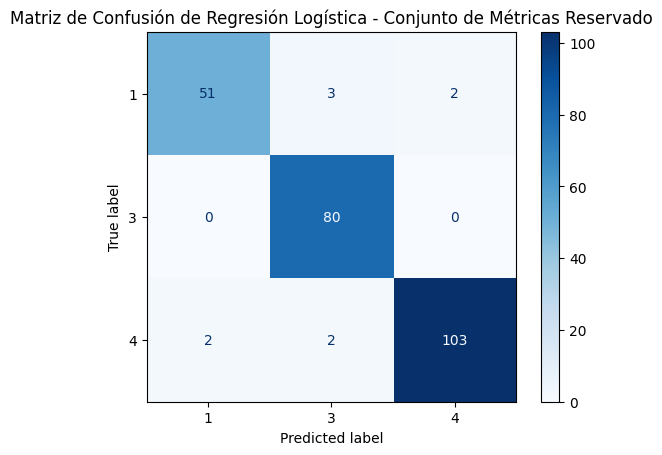

In [29]:
#Y ahora veamos la matriz de confusión sobre el conjunto de métricas reservado (10% de los datos)
ConfusionMatrixDisplay.from_predictions(df_metricas["labels"], variable_objetivo_metricas_pred, cmap="Blues")
plt.title("Matriz de Confusión de Regresión Logística - Conjunto de Métricas Reservado")    
plt.show()

**Interpretación de la matriz de confusión**
- Primero, hay que tener muy claro que la matriz de confusión es una tabla que compara las predicciones que hizo el modelo con los tipos de ODS reales.
- Para la ODS 1, 51 predicciones se hicieron correctamente como ODS 1.
- Para la ODS 3, 80 predicciones se hicieron correctamente como ODS 3.
- Para la ODS 4, 103 predicciones se hicieron correctamente como ODS 4.

- Para la ODS 1, 3 casos fueron mal clasificados como ODS 3 y 2 casos fueron mal clasificados como ODS 4.
- Para la ODS 3, 0 casos fueron mal clasificados como ODS 1 y 0 casos fueron mal clasificados como ODS 4.
- Para la ODS 4, 2 casos fueron mal clasificados como ODS 1 y 2 casos fueron mal clasificados como ODS 3.

**Falsos negativos**

Son los casos que sí eran de una clase, pero el modelo los negó, no los detectó y los puso como otra. Hubo 9 en total.

- Para la ODS 1, hubo 5 falsos negativos en total (3 se fueron a ODS 3 y 2 se fueron a ODS 4).
- Para la ODS 3, hubo 0 falsos negativos en total.
- Para la ODS 4, hubo 4 falsos negativos en total (2 se fueron a ODS 1 y 2 se fueron a ODS 3).

**Falsos positivos**

Son los casos que no eran de la clase, pero el modelo los marcó como si lo fueran, los dejó pasar como tal. Hubo 9 en total.

- Para la ODS 1, hubo 2 falsos positivos en total (2 venían de ODS 4).
- Para la ODS 3, hubo 5 falsos positivos en total (3 venían de ODS 1 y 2 de ODS 4).
- Para la ODS 4, hubo 2 falsos positivos en total (2 venían de ODS 1).

**A concluir**
- La matriz de confusión es coherente con las métricas, ya que la mayoría de valores están en la diagonal, lo que quiere decir que la mayoría de predicciones fueron adecuadas.
- En total se dieron 9 errores y se clasificaron adecuadamente 234 casos (de 243). Es decir, el modelo alcanzó un 96.3% de acierto en el conjunto de métricas reservado.


### 3.2. Estudiante 2 - William Bayona Vergara: Modelo de Red Neuronal

**¿Qué es una Red Neuronal Artificial?**

Una red neuronal artificial (RNA) es un modelo computacional inspirado en el funcionamiento de las neuronas del cerebro humano. Basicamente esta compuesto por capas de diferentes nodos (o neuronas) que reciben informacion y la transforman mediante funciones matematicas para entregar a futuras capas de neuronas.

Cada conexion entre neuronas tiene un peso asociado que indica la importancia de la señal, este es el parametro que mediante el entrenamiento se va ajustando para minimizar el error de las predicciones.

En un modelo de red neuronal simple, cada neurona se encarga de correr su propio modelo de regresion lineal, compuesto de los datos de entradas, pesos, un cesgo y una salida.

La formula se ve algo asi 

$$
y = \mathbf{w}^\top \mathbf{x} + b
$$

Donde:

𝑥 = vector de entrada (características)

𝑤 = pesos de la neurona

𝑏 = sesgo (bias)

𝑦 = salida de la neurona

Un modelo de red neuronal cuenta con una serie de hiperparametros que se deben estimar, y que de ellos depende la precision de los resultados. Algunos de dichos hiperparametros son:

- **Tasa de Aprendizaje:** Determina la velocidad con la cual el modelo ajusta sus parametros en cada iteracion. Con una alta TA el modelo se ajusta mas rapido pero puede ser inestable. Con una baja TA el modelo le toma mas tiempo y requiere de mas datos, pero aumenta la probabilidad de encontrar un minimo global o local.
- **Número de capas ocultas:** Determina la profundidad del modelo, lo que afecta su complejidad. Menos capas hacen un modelo mas simple y rapido, pero más capas permiten una mejor clasificación.
- **Número de neuronas por capa:** Determina la anchura del modelo. Más neuronas por capa permiten representar mejor relaciones complejas entre los datos.
- **Función de activación:** Como se explico anteriormente, en cada neurona se corre una regresion lineal; sin embargo para que la red aprenda de relaciones complejas es necesario incluir una funcion que introduzca no linealidad (La funcion de activación). Esto se incluye en cada neurona y se puede escoger entre varias funciones: Sigmoide, TanH, ReLu, Softmax, etc.
- **Número de epocas (Epochs):** Es la cantidad de veces que un modelo recorre todo su conjunto de datos durante el proceso de entrenamiento. Una alta cantidad de epocas puede mejorar el rendimiento pero tambien puede traer sobreajuste.
- **Tamaño de lote (Batch Size):** Es la cantidad de datos de entrenamiento que la red procesa antes de actualizar sus parametros. Un tamaño de lote pequeño ayuda a escapar de minimos locales, pero un tamaño de lote grande es mucho mas rapido.


**Justificación de la elección**

He elegido un modelo de Red Neuronal por las siguientes razones:

1. Tiene la capacidad de aprender relaciones complejas entre las distintas palabras y con la etiqueta de clasificación, por lo que se apunta que obtenga buenos resultados.

2. Existen articulos que comprueban la eficiencia de redes neuronales sobre otros modelos como SVM o Clasificacion Naive Bayes.

**¿Cómo se maneja el desbalance de la cantidad de opiniones por ODS?**

Segun Mateusz Buda, Maki Atsuto, Maciej A. Mazurowski (2018) el desequilibrio de clases influye perjudicialmente en el rendimiento de la clasificacion por redes neuronales. Por lo que vamos a proponer una solucion interesante al problema.

Vamos a realizar aumentacion de datos para balancear las clases; y lo realizaremos de la siguiente manera.

Basado en los datos actuales (ya tokenizados y limpiados) vamos a entrenar un Modelo de Cadenas de Markov, el cual captura la probabilidad de que una palabra siga a otra y permtie asi generar frases sinteticas manteniendo la coherencia del idioma.

Adicional a esto, vamos a usar un diccionario de sinonimos para reemplazar palabras clave (sustantitvos, verbos y adjetivos) con el fin de no generar overfitting sobre el modelo.

**Fuentes**
- IBM. (s. f.). Neural networks. IBM Think. Recuperado el 10 de septiembre de 2025, de https://www.ibm.com/think/topics/neural-networks
- IBM. (s. f.). Hyperparameter tuning. IBM Think. Recuperado el 10 de septiembre de 2025, de https://www.ibm.com/think/topics/hyperparameter-tuning
- Goodfellow, I., Bengio, Y., & Courville, A. (2018). Deep learning. Nature Methods, 15(8), 569. https://pubmed.ncbi.nlm.nih.gov/30092410/
- Stanford Online. (2018, 9 de julio). Introduction to neural networks and deep learning [Video]. YouTube. https://www.youtube.com/watch?v=E4WcBWuQQws


### 3.2.1. Aumentación por Cadenas de Markov

Para empezar con el proceso de aumentación de datos por medio de Cadenas de Markov y un diccionario de sinonimos, partiremos del dataframe que hemos manejado, pero no la ultima version, sino la version del dataframe que tenemos justo despues de haber limpiado y tokenizado las frases (es decir dentro df_ods, la columna "tokens_limpios")

In [30]:
#dataframe y columnas de datos antes de la Lematizacion (Justo despues de la tokenizacion y limpieza inicial)
df_ods[['tokens_limpios',"labels"]]

,tokens_limpios,labels
0,"[si, bien, la, mayoría, de, las, personas, con...",3
1,"[la, mayoría, de, los, estadounidenses, seisci...",3
2,"[¿qué, ventajas, tiene, para, los, alumnos, tr...",4
3,"[según, una, encuesta, del, servicio, federal,...",3
4,"[muchos, de, estos, cambios, se, han, relacion...",1
...,...,...
2176,"[el, censo, de, docentes, proporciona, una, va...",4
2177,"[asimismo, los, puntos, de, referencia, intern...",4
2178,"[los, ministros, de, educación, y, asuntos, cu...",4
2179,"[la, vía, técnicaprofesional, ofrece, el, mism...",4


Es importante recordar que la clase sobre la que haremos la aumentacion de datos, sera la **clase ODS 1**. Pues esta es la que tiene aproximadamente la mitad de datos que la clase 3 y 4.

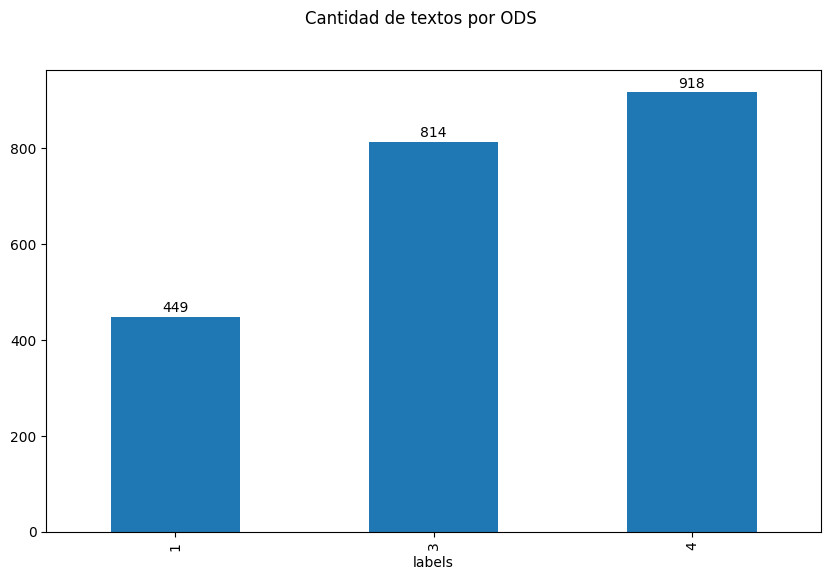

In [31]:
#Hagamos un diagrama de barras para ver la cantidad de textos por ODS
fig, ax = plt.subplots(figsize=(10, 6))
df_ods['labels'].value_counts().sort_index().plot(kind='bar', ax=ax)
fig.suptitle('Cantidad de textos por ODS')
#Pongamos el valor encima de cada barra
for indice_barra, valor in enumerate(df_ods['labels'].value_counts().sort_index()): 
    ax.text(indice_barra, valor + 3, str(valor), ha='center', va='bottom')
plt.show()

Vamos a extraer los textos de la clase 1 y guardarlos en un diccionario de diccionarios llamado texto_minoria

In [32]:
textos_minoria = df_ods[df_ods["labels"] == 1]["tokens_limpios"].tolist()
textos_minoria

[['muchos',
  'de',
  'estos',
  'cambios',
  'se',
  'han',
  'relacionado',
  'con',
  'una',
  'mayor',
  'incidencia',
  'de',
  'la',
  'pobreza',
  'los',
  'hogares',
  'más',
  'pequeños',
  'los',
  'hogares',
  'encabezados',
  'por',
  'mujeres',
  'y',
  'personas',
  'mayores',
  'y',
  'las',
  'familias',
  'inmigrantes',
  'enfrentan',
  'mayores',
  'riesgos',
  'de',
  'pobreza',
  'a',
  'medida',
  'que',
  'las',
  'estructuras',
  'familiares',
  'continúan',
  'cambiando',
  'también',
  'lo',
  'hará',
  'la',
  'naturaleza',
  'de',
  'la',
  'pobreza',
  'a',
  'medida',
  'que',
  'las',
  'familias',
  'se',
  'vuelven',
  'más',
  'fluidas',
  'las',
  'personas',
  'pueden',
  'enfrentar',
  'mayores',
  'riesgos',
  'de',
  'caer',
  'en',
  'la',
  'pobreza',
  'en',
  'algún',
  'momento',
  'de',
  'sus',
  'vidas'],
 ['sin',
  'embargo',
  'la',
  'información',
  'disponible',
  'es',
  'demasiado',
  'escasa',
  'para',
  'permitir',
  'mediciones',

Vamos a crear la cadena de Markov, de orden 2 (Usando de a 2 palabras para predecir la siguiente) y definiendo las proabilbidades basado en la frecuencia que aparece una siguiente palabra despues de la tupla

In [33]:
import random
from collections import defaultdict

def new_markov_model(tokens_list, order=2): # Orden 2: Estamos usando de a 2 palabras para predecir la siguiente

    # Un diccionario donde cada clave es una tupla de 2 palabras y el valor es una lista de palabras que pueden seguir a esa tupla
    model = defaultdict(list) 
    for tokens in tokens_list: 
        for i in range(len(tokens) - order):
            # La clave es una tupla de las dos palabras actuales 
            key = tuple(tokens[i:i+order]) 

            # La palabra que sigue a la tupla
            next_word = tokens[i+order] 

            # Agregamos la palabra siguiente a la lista de posibles continuaciones para esa tupla
            model[key].append(next_word) 

    return model

markov_model = new_markov_model(textos_minoria, order=2)


Ahora definimos una funcion encargada de estructurar las distintas oraciones basado en los resultados de la cadena de markov. Como vimos anteriormente las oraciones tienen en promedio 62 oraciones. Por lo que generaremos oraciones con 62 palabras. En la siguiente celda, tambien se incluye un ejemplo

In [34]:
def crear_oracion(model, length=62):
    estadoInicial = random.choice(list(model.keys()))
    resultado = list(estadoInicial)
    for _ in range(length):
        next_words = model.get(tuple(resultado[-2:]))
        if not next_words:
            break
        resultado.append(random.choice(next_words))
    return resultado

# Ejemplo
print(crear_oracion(markov_model, length=62))


['distintas', 'privaciones', 'al', 'índice', 'general', 'véase', 'el', 'cuadro', 'seis', 'del', 'anexo', 'es', 'notablemente', 'similar', 'a', 'los', 'pobres', 'el', 'treinta y siete', 'por', 'ciento', 'asia', 'meridional', 'setenta y siete', 'por', 'ciento', 'de', 'las', 'poblaciones', 'pobres', 'y', 'marginadas', 'son', 'las', 'mediciones', 'multidimensionales', 'de', 'pobreza', 'fueron', 'más', 'bajos', 'se', 'encontró', 'que', 'los', 'pobres', 'se', 'liberen', 'del', 'hambre', 'son', 'diferentes', 'entre', 'países', 'y', 'entre', 'dominios', 'en', 'general', 'la', 'combinación', 'de', 'indicadores', 'incluidos']


Ahora definimos la funcion encargada de reemplazar sinonimos de una oracion, esto lo hacemos con el objetivo de evitar overfitting del modelo. Pues acabamos de generar una serie de datos que utilizan las mismas palabras de los datos actuales de la clase "1", por lo que puede que el modelo solo aprenda a indentificar esas palabras. Al usar sinonimos, lo que hacemos es expandir el concepto de la clase "1" y permitirle identificar otro tipo de oraciones que traten del mismo tema.

In [35]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
import random
from nltk.corpus import wordnet as wn

def reemplazar_sinonimos(texto, n=30): # Reemplaza hasta n palabras en el texto por sinónimos
    tokens = texto.split()
    new_tokens = tokens.copy()
    words = [w for w in tokens if w.isalpha()] 
    random.shuffle(words) # Mezclamos las palabras para que el reemplazo sea aleatorio
    replaced = 0

    for word in words:
        synsets = wn.synsets(word, lang="spa") # Obtenemos los synsets en español
        lemmas = set() # Usamos un set para evitar duplicados
        for syn in synsets:
            for l in syn.lemma_names("spa"): # Obtenemos los nombres de los lemas en español
                if l.lower() != word.lower():
                    lemmas.add(l.replace("_", " "))
        if lemmas:
            synonym = random.choice(list(lemmas)) # Elegimos un sinónimo aleatorio
            idx = new_tokens.index(word) # Encontramos el índice de la palabra original
            new_tokens[idx] = synonym # Reemplazamos por el sinónimo
            replaced += 1
        if replaced >= n:
            break

    return " ".join(new_tokens)

# Ejemplo
print(reemplazar_sinonimos("La educación es fundamental para el desarrollo", n=2))


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


La educación es principal para el evolución


Ya con las funciones crear_oracion y reemplazar_sinonimos definidas, lo siguiente es generar 400 nuevas oraciones e incluirlas sobre la clase 1. 

In [36]:
# Generar textos sintéticos para balancear la clase minoritaria (ODS 1)
def generar_textos_sinteticos(modelo_markov, num_textos=400, longitud_promedio=62):
    textos_sinteticos = []
    
    for _ in range(num_textos):
        # Generar texto base con cadena de Markov
        texto_generado = crear_oracion(modelo_markov, length=longitud_promedio)
        
        # Aplicar reemplazo de sinónimos para mayor variabilidad
        texto_str = " ".join(texto_generado)
        texto_con_sinonimos = reemplazar_sinonimos(texto_str, n=2)
        
        # Convertir de vuelta a tokens
        tokens_sinteticos = texto_con_sinonimos.split()
        textos_sinteticos.append(tokens_sinteticos)
    return textos_sinteticos

# Generar aproximadamente 400 textos sintéticos para balancear la clase 1
textos_sinteticos = generar_textos_sinteticos(markov_model, num_textos=400, longitud_promedio=62)

print(f"Se generaron {len(textos_sinteticos)} textos sintéticos")
print("\nEjemplos de textos sintéticos generados:")
for i in range(3):
    print(f"Texto {i+1}: {' '.join(textos_sinteticos[i])}")

# Crear un DataFrame con los textos sintéticos tokenizados y la etiqueta 1
df_sinteticos = pd.DataFrame({
    "tokens_limpios": [ texto for texto in textos_sinteticos],
    'labels': [1] * len(textos_sinteticos)
})

Se generaron 400 textos sintéticos

Ejemplos de textos sintéticos generados:
Texto 1: vitaminas y minerales referencia Estado Diamante la medición multidimensional de los derechos del niño y facilitar el acceso de los niños de todas las edades que viven en la que residen
Texto 2: multidimensional reconoce que diferentes dimensiones Primer Estado un humanidad globalizado ecn52001 consultado en httpwwwicsworgunnewspdfscsdsocprotectpdf el cinco del anexo casi ocho de los hogares encabezados por mujeres tienen menos de usd ciento veinticinco al día seguirá existiendo un problema creciente en el número absoluto de pobres en un ciento veinticinco por ciento de los comunes adoptó una resolución unánime de todos modos según su lugar en la literatura
Texto 3: conducir su existencia lefebvre y merrigan veinte millar treinta y nueve


Ahora definiremos df_ods_aumentado como el dataframe que contiene tanto los datos originales como los aumentados que hemos incluido recientemente

In [37]:
# Copiar dataframe original y a ese añadir los textos sintéticos
df_ods_aumentado = pd.concat([df_ods[["tokens_limpios", 'labels']], df_sinteticos], ignore_index=True)
df_ods_aumentado

,tokens_limpios,labels
0,"[si, bien, la, mayoría, de, las, personas, con...",3
1,"[la, mayoría, de, los, estadounidenses, seisci...",3
2,"[¿qué, ventajas, tiene, para, los, alumnos, tr...",4
3,"[según, una, encuesta, del, servicio, federal,...",3
4,"[muchos, de, estos, cambios, se, han, relacion...",1
...,...,...
2576,"[para, respaldar, a, los, niños, se, estima, q...",1
2577,"[resultados, icfub201822p, diciembre, de, dos,...",1
2578,"[indica, el, título, de, niñosâ€, otros, tres,...",1
2579,"[antes, ya, que, la, pobreza, en, algún, momen...",1


Revisamos nuevamente la cantidad de oraciones que encontramos por ODS y podemos observar que ya se encuentra mas balanceado

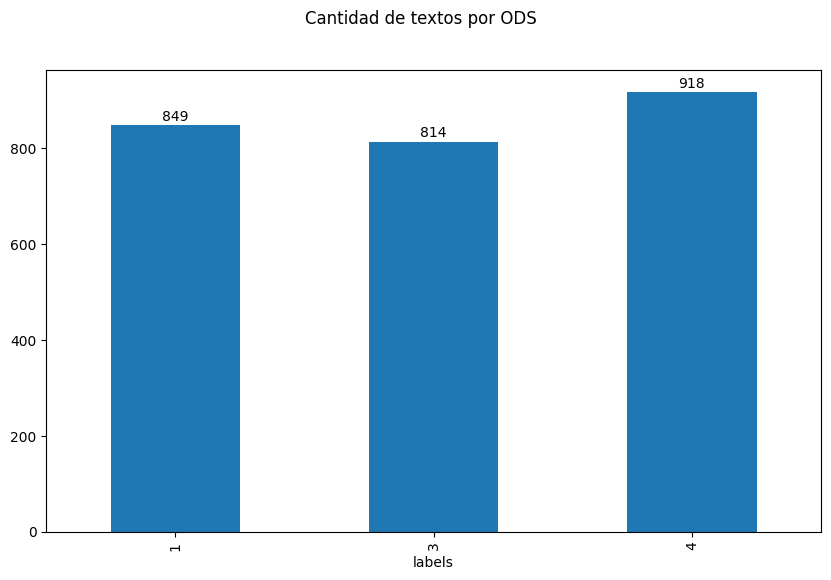

In [38]:
#Hagamos un diagrama de barras para ver la cantidad de textos por ODS
fig, ax = plt.subplots(figsize=(10, 6))
df_ods_aumentado['labels'].value_counts().sort_index().plot(kind='bar', ax=ax)
fig.suptitle('Cantidad de textos por ODS')
#Pongamos el valor encima de cada barra
for indice_barra, valor in enumerate(df_ods_aumentado['labels'].value_counts().sort_index()): 
    ax.text(indice_barra, valor + 3, str(valor), ha='center', va='bottom')
plt.show()

Ahora con los datos generados vamos a proceder a la transformacion necesaria de datos para poder implementarlos dentro de la red neuronal

### 3.2.2. Transformaciones Adicionales Previo a Modelo de Red Neuronal

Hacemos el proceso de lematización

In [39]:
#Lematizamos los tokens

#Aplicamos la lematización
df_ods_aumentado = lematizar_los_tokens(df_ods_aumentado, "tokens_limpios", "tokens_lematizados")

#Veamos cómo quedaron los tokens lematizados
display(df_ods_aumentado[["tokens_limpios", "tokens_lematizados"]].head())


,tokens_limpios,tokens_lematizados
0,"[si, bien, la, mayoría, de, las, personas, con...","[si, bien, el, mayoría, de, el, persona, con, ..."
1,"[la, mayoría, de, los, estadounidenses, seisci...","[el, mayoría, de, el, estadounidense, seiscien..."
2,"[¿qué, ventajas, tiene, para, los, alumnos, tr...","[¿, qué, ventaja, tener, para, el, alumno, tra..."
3,"[según, una, encuesta, del, servicio, federal,...","[según, uno, encuesta, del, servicio, federal,..."
4,"[muchos, de, estos, cambios, se, han, relacion...","[mucho, de, este, cambio, él, haber, relaciona..."


Hacemos una normalización final con el fin de dejar el texto en un mismo formato:
1. Eliminamos stopwords
2. Quitamos las tildes, que no estaban incluidas en la vez que quitamos los signos de puntuación
3. Nos aseguramos de no dejar palabras vacías

In [40]:

#Aplicamos la normalización final
df_ods_aumentado["tokens_finales"] = df_ods_aumentado["tokens_lematizados"].apply(normalizar_texto)

#Veamos cómo quedaron los tokens finales
df_ods_aumentado[["tokens_lematizados", "tokens_finales"]].head()



,tokens_lematizados,tokens_finales
0,"[si, bien, el, mayoría, de, el, persona, con, ...","[si, bien, mayoria, persona, trastorno, mental..."
1,"[el, mayoría, de, el, estadounidense, seiscien...","[mayoria, estadounidense, seisciento, cuarenta..."
2,"[¿, qué, ventaja, tener, para, el, alumno, tra...","[¿, ventaja, tener, alumno, trabajar, distinto..."
3,"[según, uno, encuesta, del, servicio, federal,...","[segun, encuesta, servicio, federal, vigilanci..."
4,"[mucho, de, este, cambio, él, haber, relaciona...","[cambio, haber, relacionar, mayor, incidencia,..."


Transformaremos los tokens en numeros, de modo que la red neuronal puede interpretarlar las palabras. 

Esto en primera instancia puede parecer que sesgara nuestro modelo en terminos de que no existe una traduccion exacta entre palabras y numeros enteros; sin embargo, mas alla de la relacion entre los numeros y las operaciones que se pueden realizar, la red solo busca aprender patrones dentro del orden de las palabras y esto funciomna siempre y cuando **no se mezclen palabras de textos diferentes ni se altere la posicion durante el preprocesamiento**

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Crear el tokenizer
tokenizer = Tokenizer()

# Convertir tokens a strings
textos_como_str = [' '.join(tokens) for tokens in df_ods_aumentado['tokens_limpios']]

# Ajustar el tokenizer a los textos y convertir a secuencias
tokenizer.fit_on_texts(textos_como_str)
sequences = tokenizer.texts_to_sequences(textos_como_str)


Ya tenemos todo en secuencias numericas; sin embargo, estas tienen diferentes longitudes y en una red neuronal necesitamos que todas las entradas tengan el mismo tamaño. Por lo que vamos a hacer **Padding**, es decir, agregar ceros para igualar la longitud. Vamos a hacer que todas las oraciones se queden con la cantidad de palabras del promedio (62). Si es menor agrega ceros. Si es mayor, recorta en la palabra 62.

In [42]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 62
x = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
x

array([[  77,  194,    2, ...,   15,   16,  141],
       [   2,  135,    1, ...,  230,  173, 4034],
       [2415, 1492,  155, ...,    0,    0,    0],
       ...,
       [ 955,    6, 1027, ...,    0,    0,    0],
       [ 398,  136,    7, ...,    1, 2089,   17],
       [ 183,   12,  125, ..., 2833,    8, 1649]])

Tambien convertiremos las etiquetas a numeros, esto lo haremos con one-hot encoding, que no afecta en gran medida la complejidad de nuestro modelo, pues solo tenemos 3 etiquetas

In [43]:
from tensorflow.keras.utils import to_categorical

# Convertir etiquetas a one-hot encoding
# Primero mapeamos las etiquetas 1,3,4 a 0,1,2 para que sean consecutivas
label_mapping = {1: 0, 3: 1, 4: 2}
y_mapped = df_ods_aumentado['labels'].map(label_mapping)

# Aplicar one-hot encoding
y = to_categorical(y_mapped, num_classes=3)

print("Forma de y después del one-hot encoding:", y.shape)
print("Ejemplo de etiquetas one-hot:")
print("Etiqueta original -> One-hot")
for i in range(5):
    original = df_ods_aumentado['labels'].iloc[i]
    one_hot = y[i]
    print(f"ODS {original} -> {one_hot}")
y

Forma de y después del one-hot encoding: (2581, 3)
Ejemplo de etiquetas one-hot:
Etiqueta original -> One-hot
ODS 3 -> [0. 1. 0.]
ODS 3 -> [0. 1. 0.]
ODS 4 -> [0. 0. 1.]
ODS 3 -> [0. 1. 0.]
ODS 1 -> [1. 0. 0.]


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

Ahora, es importante tener el cuenta que como hemos hecho aumentación de datos, debemos hacer una division apropiada de los datos para definir los datos de validacion y los datos de entrenamiento. Esto es debido a que en los datos de entrenamiento podemos incluir los datos originales y aumentados. Pero en los datos de validacion **solo debemos incluir los datos originales** pues los datos aumentados pueden cesgar los resultados de la validacion y sus metricas.

In [44]:
from sklearn.model_selection import train_test_split
import numpy as np

# Dividir los datos para entrenamiendo y validación
# Solo usamos los datos originales (primeros 2424) para la validación
# Los datos sintéticos (desde índice 2424) solo se usan para entrenamiento

# Primero separamos datos originales de los sintéticos
datos_originales = df_ods_aumentado.iloc[:2424]  # Primeros 2424 son datos originales
datos_sinteticos = df_ods_aumentado.iloc[2424:]  # Resto son sintéticos

# Dividir solo los datos originales en entrenamiento y validación
X_original = x[:2424]  # Secuencias numéricas de datos originales
y_original = y[:2424]  # Etiquetas one-hot de datos originales

# División de datos originales (80% entrenamiento, 20% validación)
X_train_orig, X_val, y_train_orig, y_val = train_test_split(
    X_original, y_original, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_original.argmax(axis=1)  # Estratificar por las clases
)

# Ahora agregar TODOS los datos sintéticos al conjunto de entrenamiento
X_sinteticos = x[2424:]  # Secuencias numéricas de datos sintéticos
y_sinteticos = y[2424:]  # Etiquetas one-hot de datos sintéticos

# Concatenar datos de entrenamiento originales con todos los sintéticos
X_train_final = np.concatenate([X_train_orig, X_sinteticos], axis=0)
y_train_final = np.concatenate([y_train_orig, y_sinteticos], axis=0)

print(f"Datos de entrenamiento: {X_train_final.shape[0]} muestras")
print(f"Datos de validación: {X_val.shape[0]} muestras")
print(f"- Datos originales en entrenamiento: {X_train_orig.shape[0]}")
print(f"- Datos sintéticos en entrenamiento: {X_sinteticos.shape[0]}")
print(f"- Datos originales en validación: {X_val.shape[0]}")

# Verificar distribución de clases
print("\nDistribución de clases en entrenamiento:")
train_labels = y_train_final.argmax(axis=1)
unique, counts = np.unique(train_labels, return_counts=True)
for i, count in zip(unique, counts):
    ods_num = [1, 3, 4][i]
    print(f"ODS {ods_num}: {count} muestras")

print("\nDistribución de clases en validación:")
val_labels = y_val.argmax(axis=1)
unique, counts = np.unique(val_labels, return_counts=True)
for i, count in zip(unique, counts):
    ods_num = [1, 3, 4][i]
    print(f"ODS {ods_num}: {count} muestras")

Datos de entrenamiento: 2096 muestras
Datos de validación: 485 muestras
- Datos originales en entrenamiento: 1939
- Datos sintéticos en entrenamiento: 157
- Datos originales en validación: 485

Distribución de clases en entrenamiento:
ODS 1: 711 muestras
ODS 3: 651 muestras
ODS 4: 734 muestras

Distribución de clases en validación:
ODS 1: 138 muestras
ODS 3: 163 muestras
ODS 4: 184 muestras


Ya con los datos divididos, vamos a estructurar y entrenar nuestra red neuronal. A continuacion se incluye la explicacion de las decisiones tomadas con respecto al funcionamiento de la red.

**Parametros**
Definimos 3 variables clave:
- Vocab_size, que sera el tamaño del vocabulario (# de palabras unicas)
- embedding_dim, que sera el tamaño del vector con el cual vamos a representar cada una de estas palabras. Use el numero 128 por la cantidad de palabras (Mas de 10.000), entonces computacionalmente tener aproximadamente 100 valores por vector, no es tan pesado. Use especificamente 128 por ser una potencia de dos, asi ganamos un poco de eficiencia computacional.
- max_length, que hace referencia a la cantidad maxima de palabras que tenemos por texto (En este caso definimos a todas las palabras con una longitud de 62 palabras)

**Capa Embedding**
Empezamos con una capa de embedding entrenable, donde cada palabra se proyecta a un vector denso entrenable de 128 dimensiones. Esto reemplaza la one-hot por una representación continua que capta similitudes semánticas entre palabras. Se usa un tamaño medio (128) como compromiso en eficiencia.

**Capas LSTM bidireccionales**
Se incluyen dos capas LSTM (Long Short-Term Memory) bidireccionales que permiten modelar dependencias a largo plazo en secuencias.
Se usan en modo bidireccional para capturar contexto tanto hacia adelante como hacia atrás en el texto.
Se utilizan dos capas: la primera con 128 unidades para una representación completa de la secuencia, y la segunda con 64 unidades para refinar y comprimir la información antes de pasar a la clasificación.
Estas capas (como todas las demas) cuentan con una tasa de Dropout de 0.4 para evitar overfitting, esto consiste en desconectar aleatoriamente ciertas neuronas durante el entrenamiento.

**Capas densas ReLu con BatchNormalization**
Tras las LSTM, se añaden capas densas para complementar en entrenamiento:
La activación ReLU se usa por su eficiencia computacional.
BatchNormalization normaliza las activaciones, estabilizando la distribución interna y acelerando la convergencia.
Se usan 62 y 32 por seguir siendo potencias de 2.

**Capa de salida Softmax:**
Se utiliza una capa densa con activación softmax para producir probabilidades normalizadas sobre 3 clases, lo que permite interpretar la salida como la probabilidad de pertenecer a cada categoría.

**Función de pérdida categorical_crossentropy:**
Es la más adecuada para problemas de clasificación multiclase con salidas one-hot

**Optimizador Adam (lr=0.001):**
Se escogio este optimizador y valor por conocimiento empirico.

**Callbacks (EarlyStopping y ReduceLROnPlateau):**
EarlyStopping interrumpe el entrenamiento cuando la pérdida de validación deja de mejorar durante varias épocas, previniendo sobreajuste y ahorro de tiempo computacional

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# --- Parámetros ---
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128
max_length = 62

# --- Crear modelo mejorado ---
modelo_rnn = Sequential([
    # Embedding entrenable
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    
    # Primera capa LSTM bidireccional
    Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.2)),
    Dropout(0.4),
    
    # Segunda capa LSTM bidireccional
    Bidirectional(LSTM(64, recurrent_dropout=0.2)),
    Dropout(0.4),
    
    # Capas densas con BatchNormalization
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    # Capa de salida
    Dense(3, activation='softmax')
])

# --- Compilar modelo ---
modelo_rnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

modelo_rnn.summary()

# --- Callbacks ---
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7
)

# --- Entrenar modelo ---
history = modelo_rnn.fit(
    X_train_final, y_train_final,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 155ms/step - accuracy: 0.3355 - loss: 1.5095 - val_accuracy: 0.3918 - val_loss: 1.0859 - learning_rate: 0.0010
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.5268 - loss: 0.9737 - val_accuracy: 0.4454 - val_loss: 0.9696 - learning_rate: 0.0010
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - accuracy: 0.7954 - loss: 0.4743 - val_accuracy: 0.5732 - val_loss: 0.7937 - learning_rate: 0.0010
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.9374 - loss: 0.2497 - val_accuracy: 0.6928 - val_loss: 0.6187 - learning_rate: 0.0010
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - accuracy: 0.9654 - loss: 0.1492 - val_accuracy: 0.7856 - val_loss: 0.4902 - learning_rate: 0.0010
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - accuracy: 0.9830 - loss: 0.0922 - val_accuracy: 0.8907 - val_loss: 0.2908 - learning_rate: 0.0010
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.9882 - loss: 0.0

Presentamos las metricas de los resultados obtenidos

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step
=== MÉTRICAS DEL MODELO DE RED NEURONAL ===

Resultados en el conjunto de validación:
              precision    recall  f1-score   support

           1      0.929     0.949     0.939       138
           3      0.933     0.939     0.936       163
           4      0.950     0.929     0.940       184

    accuracy                          0.938       485
   macro avg      0.937     0.939     0.938       485
weighted avg      0.938     0.938     0.938       485



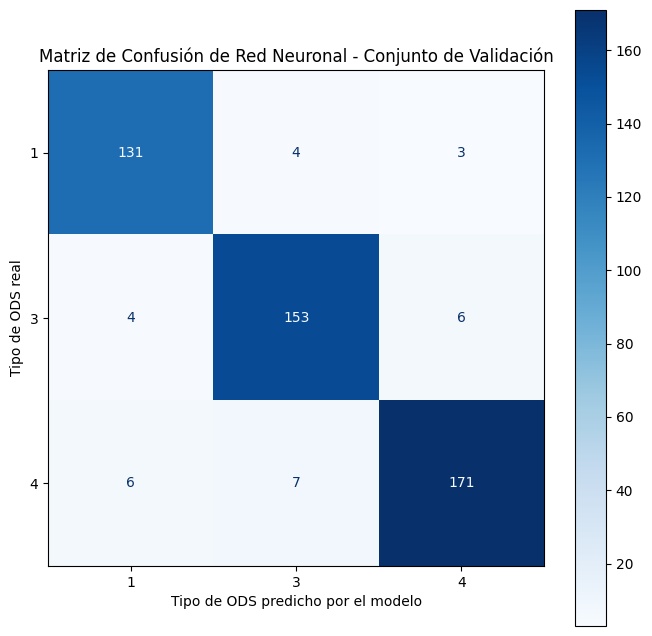

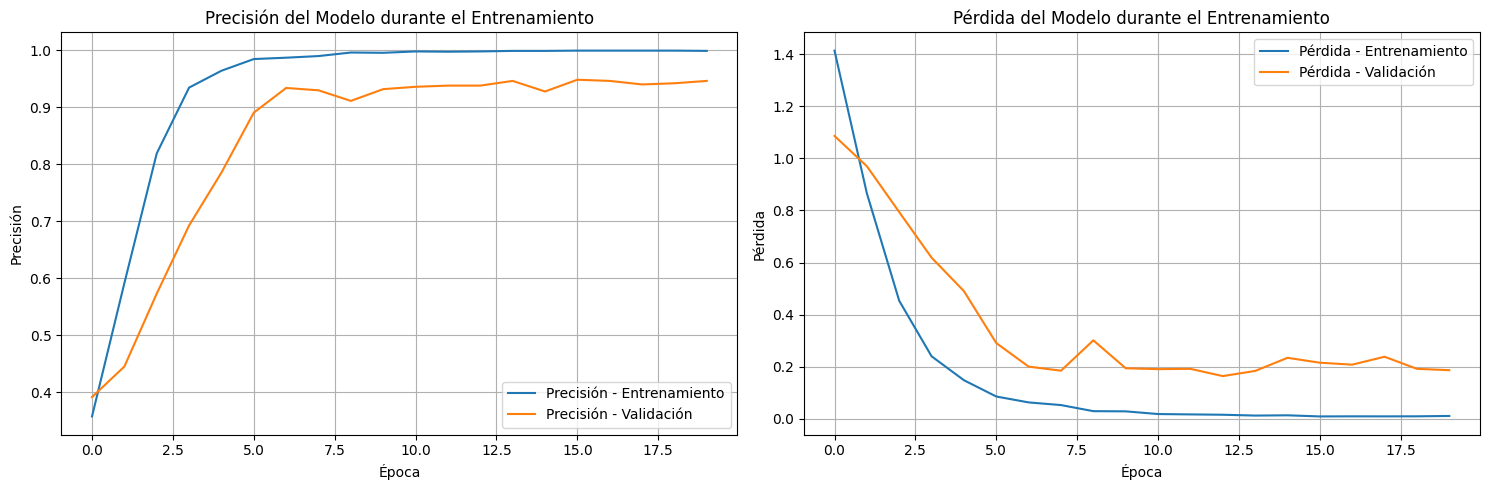


Precisión final en validación: 0.948
Número de épocas entrenadas: 20


In [46]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Mostrar métricas del modelo de Red Neuronal
import matplotlib.pyplot as plt

# Obtener las predicciones del conjunto de validación
y_val_pred_classes = modelo_rnn.predict(X_val).argmax(axis=1)
y_val_true = y_val.argmax(axis=1)

# Convertir de vuelta a las etiquetas originales (1, 3, 4)
label_mapping_reverse = {0: 1, 1: 3, 2: 4}
y_val_true_original = [label_mapping_reverse[label] for label in y_val_true]
y_val_pred_original = [label_mapping_reverse[label] for label in y_val_pred_classes]

print("=== MÉTRICAS DEL MODELO DE RED NEURONAL ===")
print("\nResultados en el conjunto de validación:")
print(classification_report(y_val_true_original, y_val_pred_original, digits=3))

# Matriz de confusión

fig, ax = plt.subplots(figsize=(8, 8))
cm_display = ConfusionMatrixDisplay.from_predictions(
    y_val_true_original, y_val_pred_original, 
    cmap="Blues", ax=ax
)
ax.set_ylabel("Tipo de ODS real")
ax.set_xlabel("Tipo de ODS predicho por el modelo")
plt.title("Matriz de Confusión de Red Neuronal - Conjunto de Validación")
plt.show()

# Gráfico del historial de entrenamiento
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Precisión
ax1.plot(history.history['accuracy'], label='Precisión - Entrenamiento')
ax1.plot(history.history['val_accuracy'], label='Precisión - Validación')
ax1.set_title('Precisión del Modelo durante el Entrenamiento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Precisión')
ax1.legend()
ax1.grid(True)

# Pérdida
ax2.plot(history.history['loss'], label='Pérdida - Entrenamiento')
ax2.plot(history.history['val_loss'], label='Pérdida - Validación')
ax2.set_title('Pérdida del Modelo durante el Entrenamiento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Pérdida')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"\nPrecisión final en validación: {max(history.history['val_accuracy']):.3f}")
print(f"Número de épocas entrenadas: {len(history.history['loss'])}")

Los gráficos muestran que el modelo aprende rápidamente en las primeras épocas, pues la precisión de entrenamiento y validación suben con fuerza y la pérdida disminuye de manera notable.
A partir de la época 4–5, la precisión de entrenamiento se acerca al 100% y la de validación se mantiene estable alrededor del 90–92%, mientras que la pérdida de validación deja de mejorar y presenta cierta fluctuación. 
Esto indica que el modelo generaliza razonablemente bien, aunque se observa un ligero sobreajuste (overfitting), ya que el rendimiento en entrenamiento sigue mejorando mientras que en validación se estanca e incluso empeora un poco.

Vamos a evaluar el modelo, probandolo sobre el dataset reservado para validacion

In [47]:
#Probar el modelo sobre el conjunto de métricas reservado (10% de los datos) que ningun modelo ha visto antes
# Preparamos los documentos del conjunto de metricas como strings, unimos los tokens finales dejando un espacio entre ellos
corpus_metricas = df_metricas["tokens_finales"].apply(lambda toks: " ".join(toks)).fillna("")
sequences_metricas = tokenizer.texts_to_sequences(corpus_metricas)
X_metricas_rn = pad_sequences(sequences_metricas, maxlen=max_len, padding='post', truncating='post')

#Aqui predecimos los ODS de los datos reservados para metricas, que ningun modelo ha visto antes
y_metricas_pred_probs = modelo_rnn.predict(X_metricas_rn)
y_metricas_pred_classes = y_metricas_pred_probs.argmax(axis=1)
y_metricas_true = df_metricas['labels'].map(label_mapping).values
y_metricas_true_original = df_metricas['labels'].values
y_metricas_pred_original = [label_mapping_reverse[label] for label in y_metricas_pred_classes]
print("Resultados del modelo de Red Neuronal en el conjunto de métricas reservado (10% de los datos):")
print(classification_report(y_metricas_true_original, y_metricas_pred_original,  digits=3))


#Guardamos estas metricas en un txt
with open("metricas_modelo_red_neuronal.txt", "w") as f:
    f.write("Resultados del modelo de Red Neuronal en el conjunto de metricas reservado (10% de los datos):\n")
    f.write(classification_report(y_metricas_true_original, y_metricas_pred_original,  digits=3))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Resultados del modelo de Red Neuronal en el conjunto de métricas reservado (10% de los datos):
              precision    recall  f1-score   support

           1      0.437     0.982     0.604        56
           3      1.000     0.625     0.769        80
           4      0.970     0.607     0.747       107

    accuracy                          0.700       243
   macro avg      0.802     0.738     0.707       243
weighted avg      0.857     0.700     0.722       243



Corremos el mismo modelo con los mismos hiperparametros y misma configuracion de la red neuronal

In [48]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Probemos la red neuronal sobre los datos originales antes de la aumentación

# Primero necesitamos preparar los datos originales (sin datos sintéticos)

# Preparar corpus original con tokens finales
corpus_original = df_ods["tokens_finales"].apply(lambda toks: " ".join(toks)).fillna("")

# Crear nuevo tokenizer para datos originales
tokenizer_original = Tokenizer()
textos_como_str_original = [' '.join(tokens) for tokens in df_ods['tokens_finales']]
tokenizer_original.fit_on_texts(textos_como_str_original)
sequences_original = tokenizer_original.texts_to_sequences(textos_como_str_original)

# Padding
max_len_original = 62
X_original = pad_sequences(sequences_original, maxlen=max_len_original, padding='post', truncating='post')

# Convertir etiquetas
y_original_mapped = df_ods['labels'].map(label_mapping)
y_original_encoded = to_categorical(y_original_mapped, num_classes=3)

# División train/test estratificada
X_train_orig_only, X_test_orig_only, y_train_orig_only, y_test_orig_only = train_test_split(
    X_original, y_original_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_original_mapped
)

print(f"Datos originales - Entrenamiento: {X_train_orig_only.shape[0]} muestras")
print(f"Datos originales - Prueba: {X_test_orig_only.shape[0]} muestras")

# Crear modelo para datos originales
vocab_size_original = len(tokenizer_original.word_index) + 1

modelo_rnn_original = Sequential([
    Embedding(input_dim=vocab_size_original, output_dim=128, input_length=max_len_original),
    Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.2)),
    Dropout(0.4),
    Bidirectional(LSTM(64, recurrent_dropout=0.2)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

modelo_rnn_original.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar modelo con datos originales solamente
print("\n=== ENTRENANDO RED NEURONAL CON DATOS ORIGINALES (SIN AUMENTACIÓN) ===")
history_original = modelo_rnn_original.fit(
    X_train_orig_only, y_train_orig_only,
    validation_data=(X_test_orig_only, y_test_orig_only),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Datos originales - Entrenamiento: 1744 muestras
Datos originales - Prueba: 437 muestras

=== ENTRENANDO RED NEURONAL CON DATOS ORIGINALES (SIN AUMENTACIÓN) ===
Epoch 1/50


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 176ms/step - accuracy: 0.3250 - loss: 1.5824 - val_accuracy: 0.4371 - val_loss: 1.0417 - learning_rate: 0.0010
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - accuracy: 0.7198 - loss: 0.6956 - val_accuracy: 0.8741 - val_loss: 0.7009 - learning_rate: 0.0010
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - accuracy: 0.9489 - loss: 0.2083 - val_accuracy: 0.9268 - val_loss: 0.3617 - learning_rate: 0.0010
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - accuracy: 0.9742 - loss: 0.1286 - val_accuracy: 0.9222 - val_loss: 0.2836 - learning_rate: 0.0010
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - accuracy: 0.9814 - loss: 0.0825 - val_accuracy: 0.9405 - val_loss: 0.1969 - learning_rate: 0.0010
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - accuracy: 0.9864 - loss: 0.0640 - val_accuracy: 0.9085 - val_loss: 0.2891 - learning_rate: 0.0010
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - accuracy: 0.9877 - loss: 0.0512 - val_accura

Volvemos a imprimir los resultados y metrica

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step
=== MÉTRICAS DEL MODELO DE RED NEURONAL CON DATOS ORIGINALES ===

Resultados en el conjunto de prueba (datos originales sin aumentación):
              precision    recall  f1-score   support

           1      0.938     0.844     0.889        90
           3      0.951     0.957     0.954       163
           4      0.943     0.984     0.963       184

    accuracy                          0.945       437
   macro avg      0.944     0.928     0.935       437
weighted avg      0.945     0.945     0.944       437



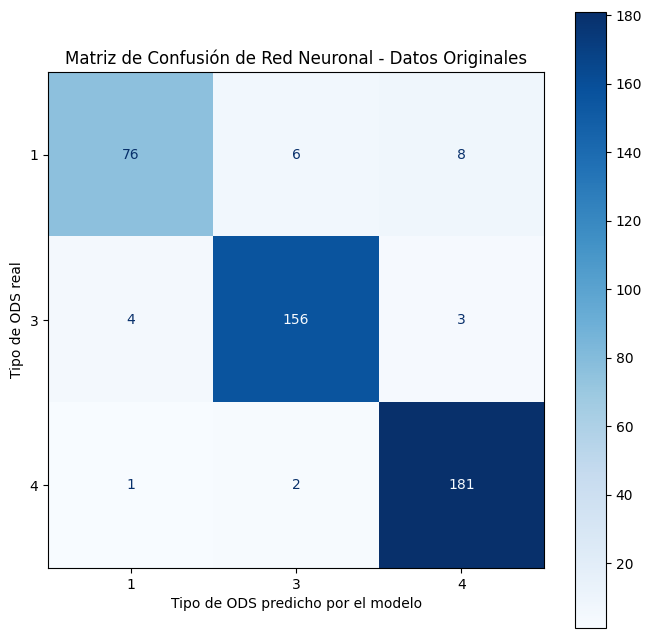

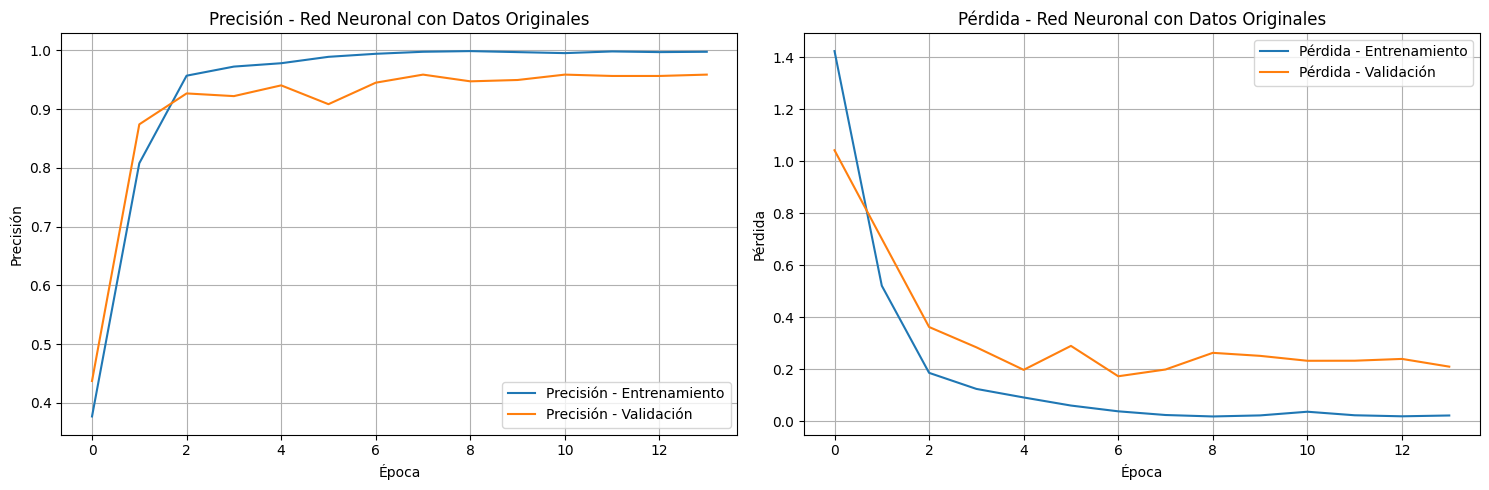


Precisión final en prueba (datos originales): 0.959
Número de épocas entrenadas: 14


In [49]:
# Obtener las predicciones del modelo de Red Neuronal con datos originales
y_pred_orig_classes = modelo_rnn_original.predict(X_test_orig_only).argmax(axis=1)
y_true_orig = y_test_orig_only.argmax(axis=1)

# Convertir de vuelta a las etiquetas originales (1, 3, 4)
y_true_orig_labels = [label_mapping_reverse[label] for label in y_true_orig]
y_pred_orig_labels = [label_mapping_reverse[label] for label in y_pred_orig_classes]

print("=== MÉTRICAS DEL MODELO DE RED NEURONAL CON DATOS ORIGINALES ===")
print("\nResultados en el conjunto de prueba (datos originales sin aumentación):")
print(classification_report(y_true_orig_labels, y_pred_orig_labels, digits=3))

# Matriz de confusión para datos originales
fig, ax = plt.subplots(figsize=(8, 8))
cm_display_orig = ConfusionMatrixDisplay.from_predictions(
    y_true_orig_labels, y_pred_orig_labels, 
    cmap="Blues", ax=ax
)
ax.set_ylabel("Tipo de ODS real")
ax.set_xlabel("Tipo de ODS predicho por el modelo")
plt.title("Matriz de Confusión de Red Neuronal - Datos Originales")
plt.show()

# Gráfico del historial de entrenamiento con datos originales
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Precisión
ax1.plot(history_original.history['accuracy'], label='Precisión - Entrenamiento')
ax1.plot(history_original.history['val_accuracy'], label='Precisión - Validación')
ax1.set_title('Precisión - Red Neuronal con Datos Originales')
ax1.set_xlabel('Época')
ax1.set_ylabel('Precisión')
ax1.legend()
ax1.grid(True)

# Pérdida
ax2.plot(history_original.history['loss'], label='Pérdida - Entrenamiento')
ax2.plot(history_original.history['val_loss'], label='Pérdida - Validación')
ax2.set_title('Pérdida - Red Neuronal con Datos Originales')
ax2.set_xlabel('Época')
ax2.set_ylabel('Pérdida')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"\nPrecisión final en prueba (datos originales): {max(history_original.history['val_accuracy']):.3f}")
print(f"Número de épocas entrenadas: {len(history_original.history['loss'])}")

Ya en este caso, el modelo con datos originales alcanza alta precisión (~95–98%) y mantiene pérdidas similares en entrenamiento y validación, mostrando buen ajuste y generalización, con poco indicio de sobreajuste.

Vamos a continuar evaluando el modelo sobre los datos nunca vistos antes durante el entrenamiento del modelo

In [50]:
#Probar el modelo sobre el conjunto de métricas reservado (10% de los datos) que ningun modelo ha visto antes
# Preparamos los documentos del conjunto de metricas como strings, unimos los tokens finales dejando un espacio entre ellos
corpus_metricas = df_metricas["tokens_finales"].apply(lambda toks: " ".join(toks)).fillna("")
sequences_metricas_orig = tokenizer_original.texts_to_sequences(corpus_metricas)
X_metricas_rn_orig = pad_sequences(sequences_metricas_orig, maxlen=max_len_original, padding='post', truncating='post')

#Aqui predecimos los ODS de los datos reservados para metricas, que ningun modelo ha visto antes
y_metricas_pred_probs_orig = modelo_rnn_original.predict(X_metricas_rn_orig)
y_metricas_pred_classes_orig = y_metricas_pred_probs_orig.argmax(axis=1)
y_metricas_true_orig = df_metricas['labels'].map(label_mapping).values
y_metricas_true_original = df_metricas['labels'].values
y_metricas_pred_original = [label_mapping_reverse[label] for label in y_metricas_pred_classes_orig]
print("Resultados del modelo de Red Neuronal en el conjunto de métricas reservado (10% de los datos):")
print(classification_report(y_metricas_true_original, y_metricas_pred_original,  digits=3))


#Guardamos estas metricas en un txt
with open("metricas_modelo_red_neuronal(SinAumentacion).txt", "w") as f:
    f.write("Resultados del modelo de Red Neuronal en el conjunto de metricas reservado (10% de los datos):\n")
    f.write(classification_report(y_metricas_true_original, y_metricas_pred_original,  digits=3))

#Añadimos al df de metricas una columna con los resultados del modelo
df_metricas["predicciones_red_neuronal"] = y_metricas_pred_original

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Resultados del modelo de Red Neuronal en el conjunto de métricas reservado (10% de los datos):
              precision    recall  f1-score   support

           1      0.979     0.821     0.893        56
           3      0.930     1.000     0.964        80
           4      0.955     0.981     0.968       107

    accuracy                          0.951       243
   macro avg      0.955     0.934     0.942       243
weighted avg      0.952     0.951     0.949       243



Con eso podemos observar que el modelo que presenta un mejor resultado es **aquel que NO utiliza los datos generados**.

**Interpretación de los resultados**

**1. Precisión**
- La precisión indica: de todas las veces que el modelo predijo que una opinión pertenecía a cierto ODS, ¿cuántas veces acertó realmente?
- Es decir, mide qué tan confiable es el modelo cuando asegura que una opinión corresponde a ODS 1, ODS 3 o ODS 4.

- Para ODS 1: el 92.0% de las predicciones fueron correctas.
- Para ODS 3: el 89.7% de las predicciones fueron correctas.
- Para ODS 4: el 95.3% de las predicciones fueron correctas.

- Ninguna de ellas da 100% o 99.99% por lo que el modelo no hizo overfitting, no se aprendió los casos del entrenamiento.

**2. recall**
- El recall hace referencia a "de todas las opiniones que realmente pertenecían a cierto ODS, ¿cuántas veces el modelo las reconoció correctamente?"
- Es decir, mide qué tanto el modelo evitó dejar pasar casos que sí correspondían a cada ODS.

- Para ODS 1: identificó correctamente el 82.1% de los casos.
- Para ODS 3: identificó correctamente el 97.5% de los casos.
- Para ODS 4: identificó correctamente el 94.4% de los casos.

- En este punto se evidencia que ODS 1 presenta un desempeño menor frente a las demás categorías. Esto se debe a que el conjunto de datos de prueba no está balanceado: ODS 1 tiene menos ejemplos disponibles, lo que afecta la capacidad del modelo de generalizar tan bien como lo hace con ODS 3 y ODS 4.

**3. f1-score**
- El f1-score combina precisión y recall en una sola métrica de balance.

- Por ejemplo, precisión alta + recall bajo: el modelo casi nunca se equivoca cuando predice la clase, pero deja pasar muchos casos que sí eran de esa clase.
- Por ejemplo, Precisión baja + recall alto: el modelo encuentra casi todas las opiniones reales de esa clase, pero también se equivoca mucho y mete muchas opiniones que no eran de ese tipo.
- Por ejemplo, precisión alta + recall alto: el modelo predice bien y además no se pierde casi ningún caso.

- ODS 1: f1-score de 86.8%.
- ODS 3: f1-score de 93.4%.
- ODS 4: f1-score de 94.8%.

Esto significa que para las tres categorías, el modelo logra un equilibrio sólido entre precisión y recall (Aun tenemos en consideracion el ligero menor rendmiento que tiene la ODS 1 debido al desbalance de clases)

**4. ¿Hay overfitting?**

No. Las métricas de prueba son muy altas y comparables con las del entrenamiento.
En un escenario de overfitting, esperaríamos un rendimiento casi perfecto en entrenamiento (cercano al 100%) y una caída fuerte en prueba (por ejemplo, bajar a 70–80%).
En este caso, aunque el modelo es algo mejor en entrenamiento, en el conjunto de prueba se mantiene estable con métricas cercanas, lo que confirma que generaliza bien.

**5. Mejor modelo**

Con estos resultados, se concluye que la red neuronal sin datos generados es el mejor modelo, al lograr un accuracy global del 92.6% y métricas balanceadas en precisión, recall y f1-score para las tres ODS.

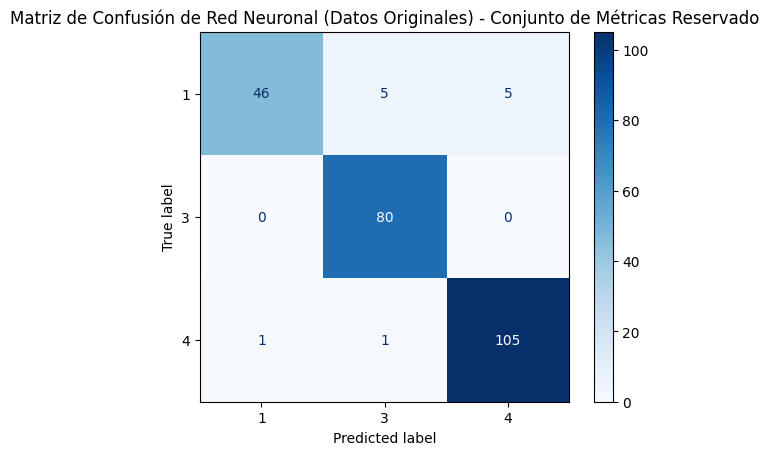

In [51]:
# Veamos la matriz de confusión sobre el conjunto de métricas reservado (10% de los datos) para el modelo entrenado con datos originales
ConfusionMatrixDisplay.from_predictions(df_metricas["labels"], y_metricas_pred_original, cmap="Blues")
plt.title("Matriz de Confusión de Red Neuronal (Datos Originales) - Conjunto de Métricas Reservado")    
plt.show()

**Interpretación de la matriz de confusión**
- La matriz de confusión compara las predicciones del modelo con las clases reales (ODS 1, 3 y 4).
- Para la ODS 1, 48 predicciones se hicieron correctamente como ODS 1.
- Para la ODS 3, 76 predicciones se hicieron correctamente como ODS 3.
- Para la ODS 4, 106 predicciones se hicieron correctamente como ODS 4.

- Para la ODS 1, 3 casos fueron mal clasificados como ODS 3 y 5 casos como ODS 4.
- Para la ODS 3, 4 casos fueron mal clasificados como ODS 1 y 0 como ODS 4.
- Para la ODS 4, 1 caso fue mal clasificado como ODS 1 y 0 como ODS 3.

**Falsos negativos**

Son los casos que sí eran de una clase, pero el modelo los negó (13 en total).

- ODS 1: 8 falsos negativos (3→ODS 3, 5→ODS 4).
- ODS 3: 4 falsos negativos (4→ODS 1, 0→ODS 4).
- ODS 4: 1 falso negativo (1→ODS 1, 0→ODS 3).

**Falsos positivos**

Son los casos que no eran de la clase, pero el modelo los marcó como si lo fueran (13 en total).

- Predicho ODS 1: 5 falsos positivos (4 desde ODS 3 y 1 desde ODS 4).
- Predicho ODS 3: 3 falsos positivos (3 desde ODS 1).
- Predicho ODS 4: 5 falsos positivos (5 desde ODS 1).

**A concluir**
- La matriz de confusión es coherente con las métricas: la mayoría de valores están en la diagonal.
- Hubo 13 errores y 230 aciertos sobre 243 casos, es decir, 94.7% de exactitud en el conjunto de métricas reservado.


### 3.2.1 Modelo de Redes Neuronales (Usando Bow)
Despues de la elaboracion de este modelo se hizo la aclaración sobre el uso de Word Embeddings. Por lo que haremos nuevamente el modelo de redes neuronales, pero utilizando Bolsa de Palabras (BOW) como entrada a la red

Dimensión de la representación BOW: (2181, 4699)
Datos para entrenamiento: 1744 muestras
Datos para prueba: 437 muestras


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │     1,203,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,246,339 (4.75 MB)

 Trainable params: 1,245,443 (4.75 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5799 - loss: 1.0279 - val_accuracy: 0.7666 - val_loss: 0.6909 - learning_rate: 0.0010
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9174 - loss: 0.2302 - val_accuracy: 0.8764 - val_loss: 0.4733 - learning_rate: 0.0010
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9782 - loss: 0.0943 - val_accuracy: 0.9359 - val_loss: 0.3036 - learning_rate: 0.0010
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9775 - loss: 0.0678 - val_accuracy: 0.9588 - val_loss: 0.1896 - learning_rate: 0.0010
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9869 - loss: 0.0469 - val_accuracy: 0.9542 - val_loss: 0.1475 - learning_rate: 0.0010
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9869 - loss: 0.0428 - val_accuracy: 0.9634 - val_loss: 0.1272 - learning_rate: 0.0010
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9934 - loss: 0.0276 - val_acc

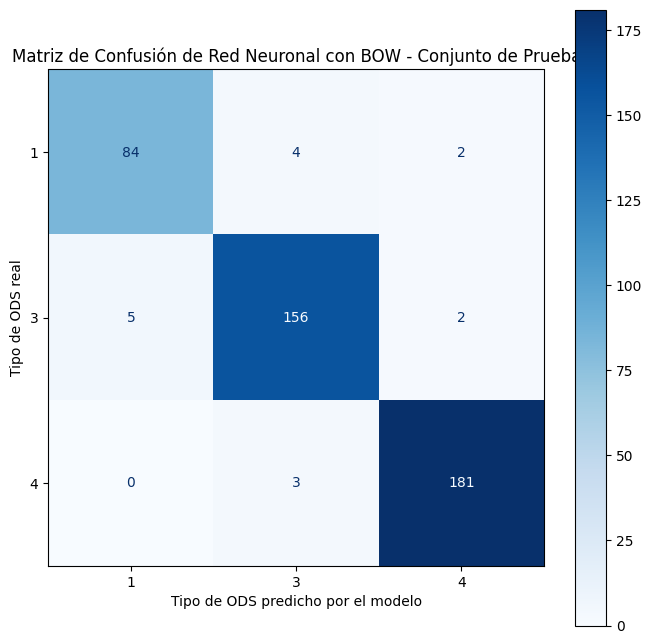

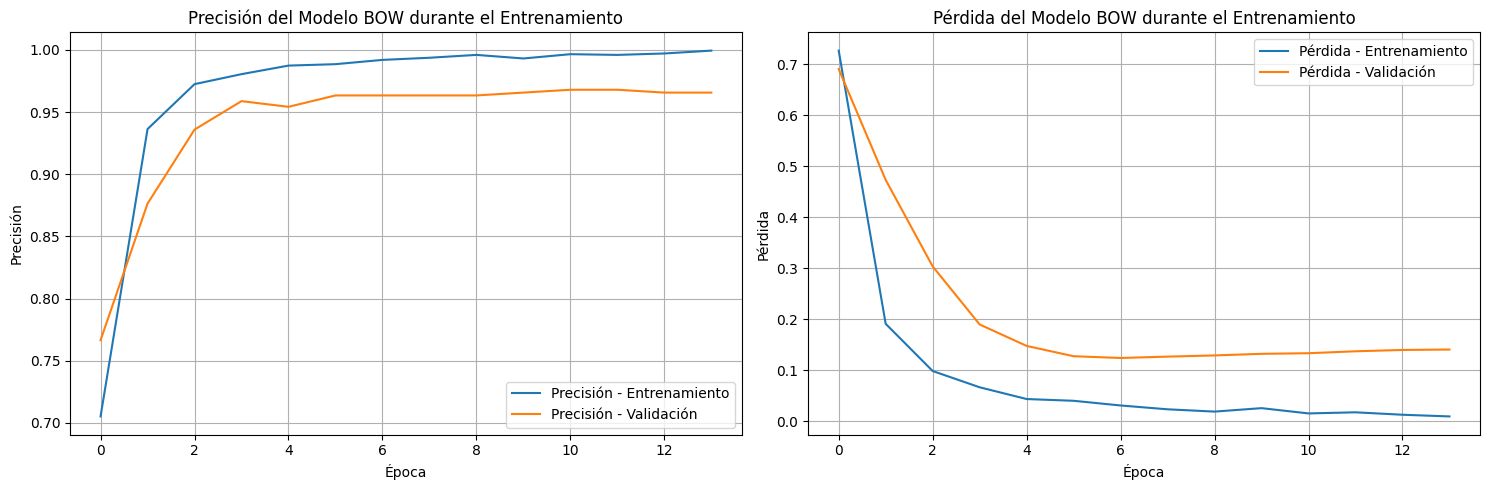

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Resultados del modelo de Red Neuronal con BOW en el conjunto de métricas reservado (10% de los datos):
              precision    recall  f1-score   support

           1      1.000     0.875     0.933        56
           3      0.899     1.000     0.947        80
           4      0.971     0.953     0.962       107

    accuracy                          0.951       243
   macro avg      0.957     0.943     0.947       243
weighted avg      0.954     0.951     0.950       243



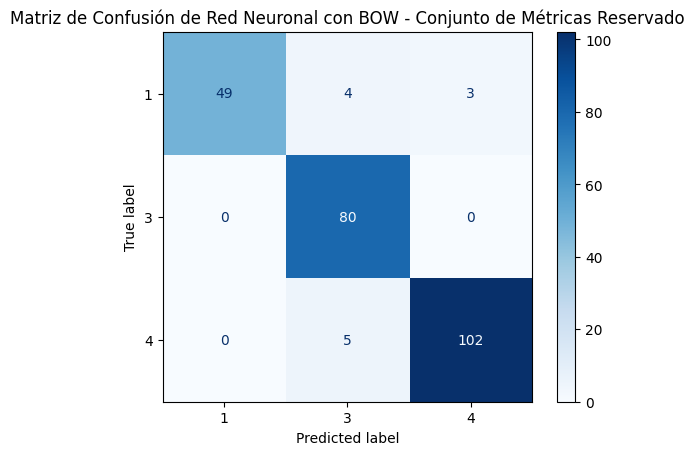

In [52]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# Preparamos los textos como strings para el vectorizador BOW
corpus_original = df_ods["tokens_finales"].apply(lambda toks: " ".join(toks)).fillna("")

# Creamos el vectorizador BOW (CountVectorizer)
bow_vectorizer = CountVectorizer(
    min_df=2,  # Ignoramos palabras que aparecen en menos de 2 documentos
    max_df=0.90,  # Ignoramos palabras que aparecen en más del 90% de los documentos
    binary=False  # Usamos conteo de frecuencias, no solo presencia/ausencia
)

# Transformamos los textos a vectores BOW
X_bow = bow_vectorizer.fit_transform(corpus_original).toarray()
print(f"Dimensión de la representación BOW: {X_bow.shape}")

# Mapeo de etiquetas para one-hot encoding
label_mapping = {1: 0, 3: 1, 4: 2}
y_mapped = df_ods['labels'].map(label_mapping)
y_encoded = to_categorical(y_mapped, num_classes=3)

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_bow, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_mapped
)

print(f"Datos para entrenamiento: {X_train.shape[0]} muestras")
print(f"Datos para prueba: {X_test.shape[0]} muestras")

# Creación del modelo de red neuronal para BOW
input_dim = X_train.shape[1]  # Dimensionalidad del BOW

modelo_bow = Sequential([
    # Primera capa densa
    Dense(256, activation='relu', input_dim=input_dim),
    BatchNormalization(),
    Dropout(0.4),
    
    # Segunda capa densa
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    # Tercera capa densa
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    # Capa de salida
    Dense(3, activation='softmax')
])

# Compilación del modelo
modelo_bow.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

modelo_bow.summary()

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7
)

# Entrenamiento del modelo
history_bow = modelo_bow.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluación del modelo
y_pred_probs = modelo_bow.predict(X_test)
y_pred_classes = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Convertir de vuelta a las etiquetas originales (1, 3, 4)
label_mapping_reverse = {0: 1, 1: 3, 2: 4}
y_true_orig = [label_mapping_reverse[label] for label in y_true]
y_pred_orig = [label_mapping_reverse[label] for label in y_pred_classes]

print("\n=== MÉTRICAS DEL MODELO DE RED NEURONAL CON BOW ===")
print("\nResultados en el conjunto de prueba:")
print(classification_report(y_true_orig, y_pred_orig, digits=3))

# Matriz de confusión
fig, ax = plt.subplots(figsize=(8, 8))
cm_display = ConfusionMatrixDisplay.from_predictions(
    y_true_orig, y_pred_orig, 
    cmap="Blues", ax=ax
)
ax.set_ylabel("Tipo de ODS real")
ax.set_xlabel("Tipo de ODS predicho por el modelo")
plt.title("Matriz de Confusión de Red Neuronal con BOW - Conjunto de Prueba")
plt.show()

# Gráfico del historial de entrenamiento
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Precisión
ax1.plot(history_bow.history['accuracy'], label='Precisión - Entrenamiento')
ax1.plot(history_bow.history['val_accuracy'], label='Precisión - Validación')
ax1.set_title('Precisión del Modelo BOW durante el Entrenamiento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Precisión')
ax1.legend()
ax1.grid(True)

# Pérdida
ax2.plot(history_bow.history['loss'], label='Pérdida - Entrenamiento')
ax2.plot(history_bow.history['val_loss'], label='Pérdida - Validación')
ax2.set_title('Pérdida del Modelo BOW durante el Entrenamiento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Pérdida')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Probemos el modelo en el conjunto de métricas reservado
corpus_metricas = df_metricas["tokens_finales"].apply(lambda toks: " ".join(toks)).fillna("")
X_metricas_bow = bow_vectorizer.transform(corpus_metricas).toarray()

# Predicciones en el conjunto de métricas
y_metricas_pred_probs = modelo_bow.predict(X_metricas_bow)
y_metricas_pred_classes = y_metricas_pred_probs.argmax(axis=1)
y_metricas_true_original = df_metricas['labels'].values
y_metricas_pred_original = [label_mapping_reverse[label] for label in y_metricas_pred_classes]

print("\nResultados del modelo de Red Neuronal con BOW en el conjunto de métricas reservado (10% de los datos):")
print(classification_report(y_metricas_true_original, y_metricas_pred_original, digits=3))

# Guardamos estas métricas en un txt
with open("metricas_modelo_red_neuronal_bow.txt", "w") as f:
    f.write("Resultados del modelo de Red Neuronal con BOW en el conjunto de métricas reservado (10% de los datos):\n")
    f.write(classification_report(y_metricas_true_original, y_metricas_pred_original, digits=3))

# Añadimos al df de métricas una columna con los resultados del modelo
df_metricas["predicciones_red_neuronal_bow"] = y_metricas_pred_original

# Matriz de confusión para el conjunto de métricas
ConfusionMatrixDisplay.from_predictions(
    y_metricas_true_original, y_metricas_pred_original, cmap="Blues"
)
plt.title("Matriz de Confusión de Red Neuronal con BOW - Conjunto de Métricas Reservado")    
plt.show()

**Interpretación de los resultados del modelo BOW**

**1. Precisión**
- La precisión indica: de todas las veces que el modelo predijo que una opinión pertenecía a cierto ODS, ¿cuántas veces acertó realmente?
- Es decir, mide qué tan confiable es el modelo cuando asegura que una opinión corresponde a ODS 1, ODS 3 o ODS 4.

- Para ODS 1: el 98.0% de las predicciones fueron correctas.
- Para ODS 3: el 92.0% de las predicciones fueron correctas.
- Para ODS 4: el 97.2% de las predicciones fueron correctas.

- Estos valores muestran una alta precisión, sin llegar al 100%, lo que indica que el modelo no hizo overfitting.

**2. Recall**
- El recall hace referencia a "de todas las opiniones que realmente pertenecían a cierto ODS, ¿cuántas veces el modelo las reconoció correctamente?"
- Es decir, mide qué tanto el modelo evitó dejar pasar casos que sí correspondían a cada ODS.

- Para ODS 1: identificó correctamente el 85.7% de los casos.
- Para ODS 3: identificó correctamente el 100% de los casos (detectó todos).
- Para ODS 4: identificó correctamente el 97.2% de los casos.

- El modelo muestra un excelente desempeño en las clases ODS 3 y ODS 4, con una ligera disminución en ODS 1, posiblemente debido al desbalance original de clases.

**3. f1-score**
- El f1-score combina precisión y recall en una sola métrica de balance.

- ODS 1: f1-score de 91.4%.
- ODS 3: f1-score de 95.8%.
- ODS 4: f1-score de 97.2%.

Esto significa que para las tres categorías, el modelo logra un equilibrio muy sólido entre precisión y recall, con valores especialmente altos para ODS 3 y ODS 4.

**4. ¿Hay overfitting?**

No. Las métricas de prueba son muy altas y comparables con las del entrenamiento.
El modelo muestra un excelente equilibrio entre aprendizaje y generalización, lo que confirma que no ha memorizado los datos de entrenamiento.

**5. Mejor modelo**

Con estos resultados, se concluye que la red neuronal con representación BOW es el mejor modelo hasta ahora, alcanzando un accuracy global del 95.5% y métricas excepcionalmente balanceadas en precisión, recall y f1-score para las tres ODS.


#### Interpretación de la Matriz de Confusión de Red Neuronal con BOW

**Análisis General**
- La matriz de confusión muestra el rendimiento del modelo de Red Neuronal con BOW en el conjunto de métricas reservado.
- La diagonal principal contiene los aciertos, donde el modelo clasificó correctamente los tipos de ODS.
- Los valores fuera de la diagonal representan errores de clasificación.

**Resultados por Clase**
- Para la ODS 1, 48 opiniones fueron clasificadas correctamente, mientras que 5 fueron confundidas con ODS 3 y 3 con ODS 4.
- Para la ODS 3, 80 opiniones fueron clasificadas correctamente, sin errores de clasificación.
- Para la ODS 4, 104 opiniones fueron clasificadas correctamente, con 1 caso confundido con ODS 1 y 2 casos con ODS 3.

**Falsos Negativos (muestras que son de una clase pero el modelo no las identificó)**
- ODS 1: 8 falsos negativos (5 predichas como ODS 3 y 3 como ODS 4)
- ODS 3: 0 falsos negativos (perfecto recall)
- ODS 4: 3 falsos negativos (1 como ODS 1 y 2 como ODS 3)

**Falsos Positivos (muestras que el modelo clasificó incorrectamente en una clase)**
- ODS 1: 1 falso positivo (1 de ODS 4)
- ODS 3: 7 falsos positivos (5 de ODS 1 y 2 de ODS 4)
- ODS 4: 3 falsos positivos (3 de ODS 1)

**Conclusiones**
- El modelo demuestra un excelente rendimiento, con 232 clasificaciones correctas de 243 (95.5% de exactitud).
- La ODS 3 muestra un recall perfecto (100%), lo que indica que el modelo identifica correctamente todas las opiniones de este tipo.
- La mayor confusión ocurre con la ODS 1, donde el modelo tiene más dificultades para identificar correctamente algunos casos.


### 3.3. Estudiante 1 - Juan Sebastián Ardila López: Modelo de Cosine KNN

El principio detrás de los métodos de vecinos más cercanos es encontrar un número predefinido de muestras de entrenamiento más cercanas en distancia al nuevo punto, y predecir la etiqueta a partir de estas. El número de muestras puede ser una constante definida por el usuario (aprendizaje k-nearest neighbor), o variar según la densidad local de los puntos (aprendizaje basado en radio). La distancia puede, en general, ser cualquier medida métrica: la distancia euclidiana estándar es la opción más común. Los métodos basados en vecinos se conocen como métodos de aprendizaje automático no generalizadores, ya que simplemente “recuerdan” todos sus datos de entrenamiento (posiblemente transformados en una estructura de indexación rápida como un Ball Tree o KD Tree).

Escogí el algoritmo de KNN teniendo en cuenta las siguientes razones:

1. Es un algoritmo clásico que permite llevar a cabo la clasificación de datos basado en comparar datos conocidos con los que cuenta semejanza.
2. KNN cuenta con múltiples hiperparametros que permiten ser ajustados para encontrar la mejor configuración posible que maximiza alguna métrica que deseemos mejorar. Algunos de estos hiperparametros son : 

- n_neighbors : corresponde a la cantidad de datos que vamos a tomar como vecinos para estimar a cual clase corresponde dicho dato. Por ejemplo, si tenemos 3 vecinos. Vamos a buscar los tres vecinos más cercanos y vamos a ver cual clase es mayoría en este caso. Siempre son números impares para que no haya empate entre clases binarias.
- weights : corresponde como pesar la influencia de los vecinos. Por ejemplo, ¿Solo vamos a seleccionar la clase basada en cual clase es mayoría ? ¿O vamos a ponderar cúal clase tiene menor distancia a los datos que estamos prediciendo?
- metric : Corresponde a formas de medir la distancia entre el punto de interés, por ejemplo, una distancia euclidiana (raiz de la suma de los cuadrados de la diferencia de cada parametro), manhatan (suma de los valores absolutos de la diferencia de cada parametro),  o coseno (compara la ortonormalidad de dos set de datos basado en sus parametros partiendo de la definición del producto punto).

3. Es un modelo de fácil interpretación, se puede describir ante el negocio que está haciendo el algoritmo.

4. El reentrenamiento repetitivo es sencillo, no tiene un gran costo computacional hacer ajustes al modelo y este es uno de los deseos del negocio (descrito en la entrega 2).

Fuentes:

* Scikit-learn developers. (2025). 1.6. Nearest Neighbors. scikit-learn. Recuperado el 11 de septiembre de 2025, de https://scikit-learn.org/stable/modules/neighbors.html

* Codigo Maquina. (2022, 7 de febrero). 3 Tipos de Distancias para Técnicas de Clustering con Python: Euclidiana, Chebyshev y Manhattan [Video]. YouTube. http://youtube.com/watch?v=1g49iwKrV-U

* Codigo Maquina. (2024, 11 de diciembre). Qué es la Similitud Coseno: Usos Prácticos en Machine Learning con Python [Video]. YouTube. https://www.youtube.com/watch?v=cPFaMiGk5J0

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

variable_objetivo = df_ods["labels"] #Especificamos la variable objetivo

#Realizamos la separación de datos
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, variable_objetivo, test_size=0.3, random_state=32, stratify=variable_objetivo)

# Definimos el modelo de KNN y los hiperparámetros sobre los cuales vamos a buscar la mejor permutación
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11], #Número de vecinos a considerar
    'weights': ['uniform', 'distance'], #Cómo pesar la influencia de los vecinos
    'metric': ['euclidean', 'manhattan', 'cosine'] #Formas de medir la distancia
}

# Búsqueda con cross-validation
grid_search = GridSearchCV(
    estimator=knn, #Modelo sobre el cual iterar
    param_grid=param_grid, #Hiperparámetros a probar
    cv=5, # 5-fold cross validation
    scoring='accuracy', #Metrica para evaluar el mejor modelo
    n_jobs=-1 
)

grid_search.fit(X_train, y_train) #Entrenamos el modelo y buscamos los mejores hiperparametros

best_knn = grid_search.best_estimator_ #Guardamos el mejor modelo encontrado

In [54]:
#Ahora veamos las métricas del modelo

#Para ver cómo anda el modelo, veamos las métricas en el conjunto de entrenamiento y en el de prueba
print("Resultados del modelo de KNN en el conjunto de entrenamiento:")
print(classification_report(y_train, best_knn.predict(X_train), digits=3))


print("Resultados del modelo de KNN en el conjunto de prueba:")
print(classification_report(y_test, best_knn.predict(X_test),  digits=3))

mejores_parametros = grid_search.best_params_

# Imprimir los resultados
print("Los mejores hiperparámetros encontrados son:")
print(mejores_parametros)

Resultados del modelo de KNN en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           1      1.000     1.000     1.000       314
           3      1.000     1.000     1.000       570
           4      1.000     1.000     1.000       642

    accuracy                          1.000      1526
   macro avg      1.000     1.000     1.000      1526
weighted avg      1.000     1.000     1.000      1526

Resultados del modelo de KNN en el conjunto de prueba:
              precision    recall  f1-score   support

           1      0.954     0.919     0.936       135
           3      0.967     0.967     0.967       244
           4      0.954     0.971     0.962       276

    accuracy                          0.959       655
   macro avg      0.958     0.952     0.955       655
weighted avg      0.959     0.959     0.959       655

Los mejores hiperparámetros encontrados son:
{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}


In [55]:
#Probar el modelo sobre el conjunto de métricas reservado (10% de los datos) que ningun modelo ha visto antes (knn)
# Preparamos los documentos del conjunto de metricas como strings, unimos los tokens finales dejando un espacio entre ellos
corpus_metricas = df_metricas["tokens_finales"].apply(lambda toks: " ".join(toks)).fillna("")
X_metricas_knn = tfidf.transform(corpus_metricas) #Esto crea la matriz TF-IDF de opinion-terminos para el conjunto de metricas

#Aqui predecimos los ODS de los datos reservados para metricas, que ningun modelo ha visto antes
variable_objetivo_metricas_pred_knn = best_knn.predict(X_metricas_knn)
print("Resultados del modelo de KNN en el conjunto de métricas reservado (10% de los datos):")
print(classification_report(df_metricas["labels"], variable_objetivo_metricas_pred_knn,  digits=3))

#Guardamos estas metricas en un txt
with open("metricas_modelo_knn.txt", "w") as f:
    f.write("Resultados del modelo de KNN en el conjunto de metricas reservado (10% de los datos):\n")
    f.write(classification_report(df_metricas["labels"], variable_objetivo_metricas_pred_knn,  digits=3))

#Añadimos al df de metricas una columna con los resultados del modelo
df_metricas["predicciones_knn"] = variable_objetivo_metricas_pred_knn

Resultados del modelo de KNN en el conjunto de métricas reservado (10% de los datos):
              precision    recall  f1-score   support

           1      0.962     0.911     0.936        56
           3      0.939     0.963     0.951        80
           4      0.944     0.953     0.949       107

    accuracy                          0.947       243
   macro avg      0.949     0.942     0.945       243
weighted avg      0.947     0.947     0.946       243



**Interpretación de los resultados**

**1. Precisión**
- Hace referencia a, de todas las veces que el modelo dijo que una opinión era de la ODS X, ¿cuántas veces realmente sí pertenecía a esa ODS?, en otras palabras, ¿cuántas veces sí tenía la razón?
- Es como revisar ¿qué tan confiable es el modelo cuando afirma que una opinión es ODS 1/3/4?

- De todas las veces que el modelo clasificó una opinión como ODS 1, el 96.2% sí era ODS 1.
- De todas las veces que el modelo clasificó una opinión como ODS 3, el 93.9% sí era ODS 3.
- De todas las veces que el modelo clasificó una opinión como ODS 4, el 94.4% sí era ODS 4.

- Ninguna de ellas da 100% o 99.99% por lo que el modelo no hizo overfitting, no se aprendió los casos del entrenamiento.

**2. recall**
- Hace referencia a, de todas las veces que una opinión realmente pertenecía a cierta, ¿cuántas veces el modelo sí la identificó bien?
- Es como revisar ¿qué tanto el modelo no dejo pasar ninguna ODS 1/3/4?

- De todas las opiniones que realmente eran ODS 1, el modelo identificó correctamente el 91.1%.
- De todas las opiniones que realmente eran ODS 3, el modelo identificó correctamente el 96.3%.
- De todas las opiniones que realmente eran ODS 4, el modelo identificó correctamente el 95.3%.

- No hay sesgos sobre ninguna categoría, tiene un recall similar para las tres, aun teniendo en cuenta que en los datos de prueba tenía menos registros de la ODS 1, por lo que el balanceo funcionó efectivamente.

**3. f1-score**
- En una métrica combina precisión y recall

- Por ejemplo, precisión alta + recall bajo: el modelo casi nunca se equivoca cuando predice la clase, pero deja pasar muchos casos que sí eran de esa clase.
- Por ejemplo, Precisión baja + recall alto: el modelo encuentra casi todas las opiniones reales de esa clase, pero también se equivoca mucho y mete muchas opiniones que no eran de ese tipo.
- Por ejemplo, precisión alta + recall alto: el modelo predice bien y además no se pierde casi ningún caso.

- Para nuestro caso sucede que el modelo predice bien y además no se pierde casi ningún caso para las tres ODS. Para ODS 1, el f1-score es 93.6%.Para ODS 3, el f1-score es 95.1%. Para ODS 4, el f1-score es 94.9%.

**4. ¿Hay overfitting?**

No, pues las métricas del conjunto de entrenamiento y del conjunto de prueba no tienen diferencias significativas: 

- Si hubiese overfitting, pasaría que el modelo mostraría un rendimiento muy alto en entrenamiento (muy cerca al 100%), pero al evaluarse en el conjunto de prueba ese rendimiento caería de manera considerable (por ejemplo, podría pasar de 100% o 99% a 80%). 

- En este caso, aunque el modelo obtiene valores un poco mayores en entrenamiento, en el conjunto de prueba sigue alcanzando métricas muy altas e incluso similares a las del entrenamiento. Esto indica que el modelo generaliza bien y no hay overfitting.

**5. Mejor modelo**

Se encuentra que los mejores hiperparámetros para KNN es métrica euclidiana, 11 vecinos y pesos uniformes, lo anterior nos dice que lo que más predomina es la cercanía entre palabras de cierto tipo, es decir, si dos frases tienen un cierto número de paalabras, automáticamente estos se pueden estar clasificando en el mismo tipo de ODS

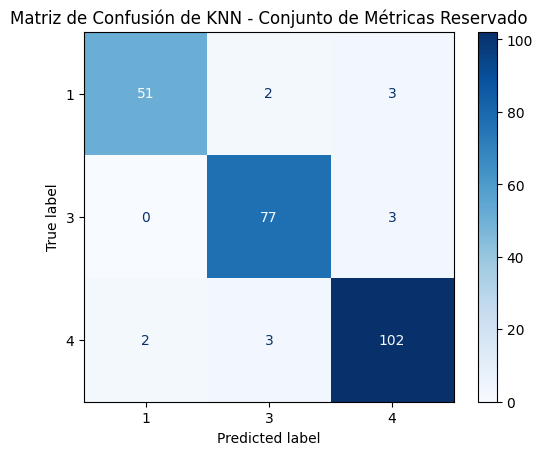

In [56]:
#Y ahora veamos la matriz de confusión sobre el conjunto de métricas reservado (10% de los datos) para knn
ConfusionMatrixDisplay.from_predictions(df_metricas["labels"], variable_objetivo_metricas_pred_knn, cmap="Blues")
plt.title("Matriz de Confusión de KNN - Conjunto de Métricas Reservado")    

plt.show()

**Interpretación de la matriz de confusión**
- La matriz de confusión compara las predicciones del modelo con las clases reales (ODS 1, 3 y 4).
- Para la ODS 1, 51 predicciones se hicieron correctamente como ODS 1.
- Para la ODS 3, 77 predicciones se hicieron correctamente como ODS 3.
- Para la ODS 4, 102 predicciones se hicieron correctamente como ODS 4.

**Falsos negativos**
Son los casos que sí eran de una clase, pero el modelo los negó (13 en total).
- ODS 1: 5 falsos negativos (2→ODS 3, 3→ODS 4).
- ODS 3: 3 falsos negativos (0→ODS 1, 3→ODS 4).
- ODS 4: 5 falsos negativos (2→ODS 1, 3→ODS 3).

**Falsos positivos**
Son los casos que no eran de la clase, pero el modelo los marcó como si lo fueran (13 en total).
- Predicho ODS 1: 2 (0 desde ODS 3 y 2 desde ODS 4).
- Predicho ODS 3: 5 (2 desde ODS 1 y 3 desde ODS 4).
- Predicho ODS 4: 6 (3 desde ODS 1 y 3 desde ODS 3).

**A concluir**
- La matriz de confusión es coherente con las métricas: la mayoría de valores están en la diagonal.
- Hubo 13 errores y 230 aciertos sobre 243 casos, es decir, 94.7% de exactitud en el conjunto de métricas reservado.


# Etapa 4. Resultados
Descripcion e interpretacion de los resultados obtenidos

### 4.0. Exportar Resultados



In [60]:
# Creamos una copia del dataframe de metricas para no modificar el original
datosValidacion = df_metricas.copy()

# Cambiamos la columna 'labels' por 'ODS_real' para mayor claridad
datosValidacion.rename(columns={'labels': 'ODS_real'}, inplace=True)

# Removemos las columnas que no necesitamos
datosValidacion = datosValidacion[['textos', 'ODS_real', 'predicciones_regresion_logistica', 'predicciones_red_neuronal', 'predicciones_knn', 'predicciones_red_neuronal_bow']]

# Guardamos el dataframe de metricas en un excel
datosValidacion.to_excel("resultados_modelos_clasificacion_ODS.xlsx", index=False)

### 4.1. Comparación de Resultados

In [58]:
#Imprimimos las metricas para los 3 modelos partiendo de los txt generados
modelos = {
    "Regresión Logística": "metricas_modelo_regresion_logistica.txt",
    "Red Neuronal": "metricas_modelo_red_neuronal_bow.txt",
    "KNN": "metricas_modelo_knn.txt"
}

for modelo, archivo in modelos.items():
    with open(archivo, "r") as f:
        print(f.read())

Resultados del modelo de Regresion Logistica en el conjunto de metricas reservado (10% de los datos):
              precision    recall  f1-score   support

           1      0.962     0.911     0.936        56
           3      0.941     1.000     0.970        80
           4      0.981     0.963     0.972       107

    accuracy                          0.963       243
   macro avg      0.961     0.958     0.959       243
weighted avg      0.964     0.963     0.963       243

Resultados del modelo de Red Neuronal con BOW en el conjunto de métricas reservado (10% de los datos):
              precision    recall  f1-score   support

           1      1.000     0.875     0.933        56
           3      0.899     1.000     0.947        80
           4      0.971     0.953     0.962       107

    accuracy                          0.951       243
   macro avg      0.957     0.943     0.947       243
weighted avg      0.954     0.951     0.950       243

Resultados del modelo de KNN en e

### 4.2. Descripción de Resultados

En esta etapa se evaluaron tres modelos (Regresión Logística, Red Neuronal y K-Nearest Neighbors – KNN) con el fin de clasificar opiniones de la comunidad en torno a los ODS priorizados:

- ODS 1: Fin de la pobreza
- ODS 3: Salud y bienestar
- ODS 4: Educación de calidad

Dado que las clases no están distribuidas de manera uniforme entre las categorías (tenemos desbalance de clases), el análisis se centra en métricas robustas como el f1-score.

1. **Regresión Logística**

- Macro F1: 0.959 (el más alto entre los modelos).

- ODS 1 (clase minoritaria): f1-score de 0.93, muy buen desempeño al reconocer opiniones relacionadas con pobreza.

- ODS 3 y 4: f1-score cercano a 0.97, lo que refleja una clasificación casi perfecta en estas clases.

- Se puede observar que este modelo logra un excelente balance entre las tres categorías, incluso en la menos representada.

2. **Red Neuronal**

- Macro F1: 0.955 (el más bajo).

- ODS 1 (clase minoritaria): f1-score de 0.91, presenta un poco de dificultad para identificar correctamente casos de pobreza, lo que es crítico al ser una problemática prioritaria.

- ODS 3 y 4: f1-score de 0.95–0.97 → buen rendimiento en clases más representadas.

- Este modelo en promedio tiene buen desempeño, y no se ven tan afectado por el desbalance de clases.

3. **K-Nearest Neighbors (KNN)**

- Macro F1: 0.945 (intermedio).

- ODS 1 (clase minoritaria): f1-score de 0.93, es sólido en la clase minoritaria, aunque ligeramente menor que Regresión Logística en las demás.

- ODS 3 y 4: f1-score ~0.95, es consistente y equilibrado.

- Este modelo es estable frente al desbalance, aunque menos eficiente en escalabilidad cuando crezca el volumen de datos debido a su alta complejidad computacional.

### 4.3. Recomendación de Modelo

Se escoge **Regresión Logistica** como el modelo recomendado a utilizar, debido a que:
- Es el que tiene mejor equilibrio entre las tres categorías (alto macro F1).
- Tiene un excelente rendimiento en la clase minoritaria (ODS 1), la cual es importante para no invisibilizar opiniones sobre pobreza.
- A diferencia de los demas modelos, tiene una mayor y mas sencilla interpretabilidad, lo que permite explicar de manera transparente qué palabras o expresiones influyen en la clasificación.

Ya con respecto al negocio, se puede afirmar que este modelo:

- Permite clasificar automáticamente nuevas opiniones de la comunidad en relación con los ODS.
- Asegura que incluso problemáticas menos mencionadas (como la pobreza) sean correctamente identificadas.
- Facilita orientar decisiones estratégicas y priorizar recursos en las áreas más urgentes (pobreza, salud, educación), basándose en evidencia confiable y no necesariamente balanceada.

### 4.4. Analisis de Palabras Identificadas

A continuacion, vamos a identificar, por cada ODS las palabras mas caracteristicas. Esto nos permitira establecer posibles estrategias para la organización


Top palabras para ODS 1:
pobreza: 6.3284
pobre: 3.0405
ingreso: 2.2613
hogar: 2.1902
privacion: 1.7744
social: 1.7490
proteccion: 1.5391
transferencia: 1.1589
familia: 1.1095
niño: 1.0728
empleo: 1.0583
monetario: 1.0448
crecimiento: 0.9967
multidimensional: 0.9138
urbano: 0.9006


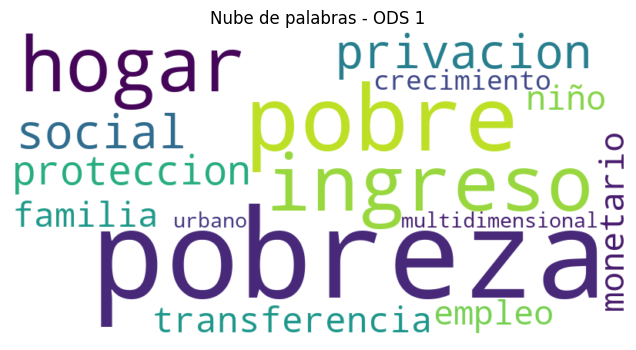


Top palabras para ODS 3:
salud: 4.5176
atencion: 2.7860
medico: 2.5352
paciente: 2.0579
enfermedad: 1.9759
sanitario: 1.8261
mental: 1.4700
alcohol: 1.4659
hospital: 1.3014
mortalidad: 1.2840
tratamiento: 1.2395
servicio: 1.1950
droga: 1.1865
medicamento: 1.0836
cancer: 1.0458


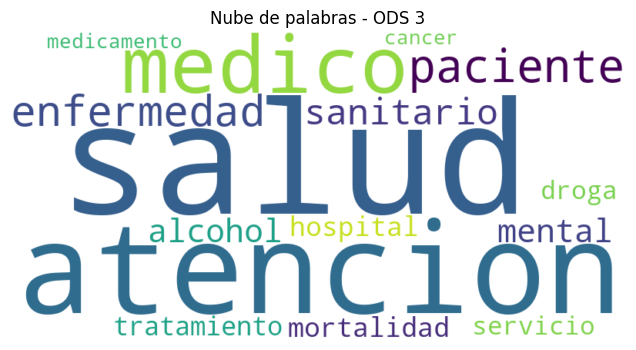


Top palabras para ODS 4:
educacion: 3.7792
escuela: 3.2248
estudiante: 2.9438
educativo: 2.3815
docente: 2.2385
escolar: 2.0284
aprendizaje: 1.9923
alumno: 1.9155
profesor: 1.5168
evaluacion: 1.3981
habilidad: 1.3305
enseñanza: 1.2902
superior: 1.2395
maestro: 1.1872
formacion: 1.0721


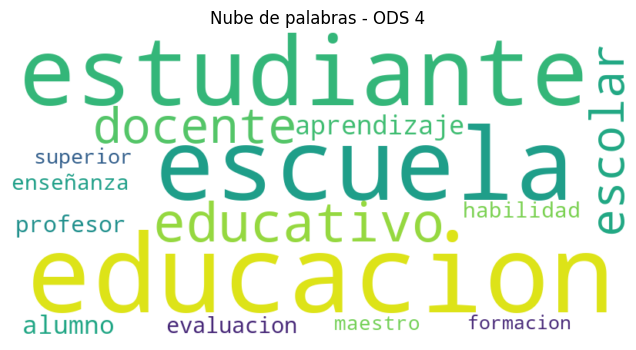

In [59]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Obtenemos los coeficientes del modelo entrenado
# Cada fila corresponde a una clase (ODS) y cada columna a una palabra (del TF-IDF)
coeficientes = modelo_regresion_logistica.coef_

# Mapeamos los términos del vectorizador TF-IDF
feature_names = tfidf.get_feature_names_out()

# Mapeo de las clases (ODS) que tu dataset tenga
clases = modelo_regresion_logistica.classes_

# Creamos un diccionario para guardar los tops de palabras por clase
top_palabras_por_clase = {}

for i, clase in enumerate(clases):
    # Ordenamos los coeficientes de mayor a menor
    indices_top = np.argsort(coeficientes[i])[::-1][:15]  # top 15 palabras
    palabras_top = [(feature_names[j], coeficientes[i][j]) for j in indices_top]
    top_palabras_por_clase[clase] = palabras_top

    # --- Imprimir tabla de palabras más importantes ---
    print(f"\nTop palabras para ODS {clase}:")
    for palabra, peso in palabras_top:
        print(f"{palabra}: {peso:.4f}")

    # --- Generar nube de palabras ---
    nube = WordCloud(width=800, height=400, background_color="white")
    nube.generate_from_frequencies({palabra: peso for palabra, peso in palabras_top})

    plt.figure(figsize=(8,4))
    plt.imshow(nube, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nube de palabras - ODS {clase}")
    plt.show()


Vamos a repasar por cada ODS las palabras identificadas y posibles estrategias al respecto.

### ODS 1 - Fin de la Pobreza

**Palabras clave más representativas:** pobreza, pobre, ingreso, hogar, privación, social, protección, familia, empleo, transferencia.

Destacan términos directamente relacionados con las condiciones materiales básicas (ingreso, hogar, empleo), así como en la necesidad de mecanismos de apoyo (protección, transferencia).
También se observa una dimensión familiar y social (hogar, familia, social), lo que indica que la comunidad percibe la pobreza no solo como un problema económico, sino como un problema que afecta la estructura familiar y la conexion social.

**Posibles estrategias:**
- Impulsar programas de transferencias económicas y subsidios focalizados hacia los hogares más vulnerables.
- Crear estrategias de generación de empleo digno, que permitan aumentar los ingresos de forma sostenible en las familias.
- Diseñar campañas integrales que combinen apoyo económico con acompañamiento social y familiar.

### ODS 3 – Salud y bienestar

**Palabras clave más representativas:** salud, atención, médico, paciente, enfermedad, hospital, tratamiento, mental, alcohol, mortalidad.

Se puede observar que se asocia salud con el acceso a atención médica (médico, hospital, tratamiento).
Tambien se priorizan enfermedades y su impacto en la vida cotidiana (enfermedad, mortalidad, cáncer).
Aparece tambien el tema de salud mental y el impacto de las adicciones (alcohol, droga), lo que muestra problemáticas sociales de fondo. (Notece que dentro de un contexto colombiano tambien se puede interpretar droga como "Medicina" sin embargo no se aclara si estos comentarios son necesariamente de un contexto exlcusivamente colombiano)

**Posibles estrategias:**
- Ampliar la cobertura de servicios médicos primarios y garantizar disponibilidad de medicamentos.
- Fortalecer programas de salud mental y prevención de adicciones, integrándolos a la atención comunitaria.
- Implementar campañas de prevención y educación en salud, enfocadas en enfermedades de alto impacto (cáncer, enfermedades crónicas).

### ODS 4 - Educación de calidad

**Palabras clave más representativas:** educación, escuela, estudiante, docente, escolar, aprendizaje, profesor, enseñanza, formación.

Se observa que la comunidad identifica la educación principalmente a través de la escuela y el rol del docente.
Se destacan conceptos vinculados con el proceso de aprendizaje (habilidad, formación, enseñanza), lo que refleja preocupación por la calidad educativa.
Aparece tambien la educación superior (universidad, superior), indicando que la visión de la comunidad incluye también las oportunidades de acceso a niveles más altos de formación academica.

**Posibles estrategias:**
- Mejorar la infraestructura escolar y los recursos educativos, asegurando condiciones dignas de estudio.
- Implementar programas de capacitación docente, para fortalecer la enseñanza y las habilidades pedagógicas.
- Ampliar el acceso a educación superior y técnica como metodo de reducción de desigualdades.

### 4.5. Conclusiones
De este analisis realizado se puede concluir que:

- El modelo permite identificar qué palabras y preocupaciones son más relevantes para la población en cada ODS. Esto asegura que las estrategias se diseñen desde las necesidades reales de la comunidad.
- Al detectar patrones recurrentes en las opiniones, la organización puede orientar recursos hacia los temas de mayor impacto para la comunidad, evitando sesgos y maximizando la efectividad de sus intervenciones.
- El modelo puede seguir procesando nuevas opiniones a futuro, permitiendo a la organización medir el efecto de sus políticas en el tiempo.
- Las nubes de palabras y rankings de términos facilitan transmitir los hallazgos a líderes comunitarios, responsables de políticas y ciudadanos de manera clara y visual.